# Лабораторная работа 1. Линейная регрессия и факторный анализ

## Цель
Изучение основ линейной регрессии, построение простейших моделей регрессии, проведение обучения модели на реальных данных и оценка её качества.

## Датасет: fetch_california_housing

### Описание
В данной работе мы будем прогнозирование стоимости недвижимости в Калифорнии на основе демографических и географических характеристик.

### Переменные

| Переменная | Описание | Статус |
|------------|-----------|---------|
| **MedInc** | Медианный доход в районе |  **Независимая переменная** |
| **HouseAge** | Медианный возраст домов в районе |  **Независимая переменная** |
| **AveRooms** | Среднее количество комнат на дом |  **Независимая переменная** |
| **AveBedrms** | Среднее количество спален на дом |  **Независимая переменная** |
| **Population** | Население района |  **Независимая переменная** |
| **AveOccup** | Среднее количество жителей на дом |  **Независимая переменная** |
| **Latitude** | Географическая широта района |  **Независимая переменная** |
| **Longitude** | Географическая долгота района |  **Независимая переменная** |
| **MEDV** | Медианная стоимость домов (в $100,000) |  **ЗАВИСИМАЯ ПЕРЕМЕННАЯ** |

### Независимые переменные для анализа:
- MedInc (Медианный доход)
- HouseAge (Возраст домов)
- AveRooms (Среднее количество комнат)
- AveBedrms (Среднее количество спален)
- Population (Население района)
- AveOccup (Средняя заполняемость домов)
- Latitude (Географическая широта)
- Longitude (Географическая долгота)

### Зависимая переменная:
- MEDV (Медианная стоимость домов в $100,000)

In [21]:
import pandas as pd
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()
dataset = pd.DataFrame(california.data, columns=california.feature_names)
dataset['MEDV'] = california.target

print(dataset)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  Longitude   MEDV
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88    -122.23  4.526
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86    -122.22  3.585
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85    -122.24  3.521
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85    -122.25  3.413
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85    -122.25  3.422
...       ...       ...       ...        ...         ...       ...       ...        ...    ...
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48    -121.09  0.781
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49    -121.21  0.771
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43    -121.22  0.923
20638  1.8672      18.0  5.329513   1.171920      

## АНАЛИЗ СТРУКТУРЫ ДАННЫХ

### Общая информация:
- **Размер датасета**: 20,640 записей × 9 признаков
- **Объем данных**: 1.4 MB в памяти
- **Типы данных**: Все признаки имеют тип `float64`

### Детальная информация о признаках:

| # | Признак | Non-Null Count | Dtype | Описание |
|---|----------|----------------|--------|-----------|
| 0 | **MedInc** | 20,640 non-null | float64 | Медианный доход |
| 1 | **HouseAge** | 20,640 non-null | float64 | Возраст домов |
| 2 | **AveRooms** | 20,640 non-null | float64 | Среднее количество комнат |
| 3 | **AveBedrms** | 20,640 non-null | float64 | Среднее количество спален |
| 4 | **Population** | 20,640 non-null | float64 | Население района |
| 5 | **AveOccup** | 20,640 non-null | float64 | Средняя заполняемость домов |
| 6 | **Latitude** | 20,640 non-null | float64 | Географическая широта |
| 7 | **Longitude** | 20,640 non-null | float64 | Географическая долгота |
| 8 | **MEDV** | 20,640 non-null | float64 | **Целевая переменная** - стоимость домов |

### Ключевые наблюдения:
 **Все данные числовые** - не требуется кодирование категориальных переменных  
 **Нулевые значения отсутствуют** - все 20,640 записей заполнены  
 **Единый тип данных** - все признаки `float64`  
 **Память оптимизирована** - эффективное хранение числовых данных  

### Статистика по памяти:
- **Общий объем**: 1.4 MB
- **На одну запись**: ≈ 71 bytes
- **На один признак**: ≈ 165 KB 

In [22]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   MEDV        20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None


АНАЛИЗ РАСПРЕДЕЛЕНИЙ:


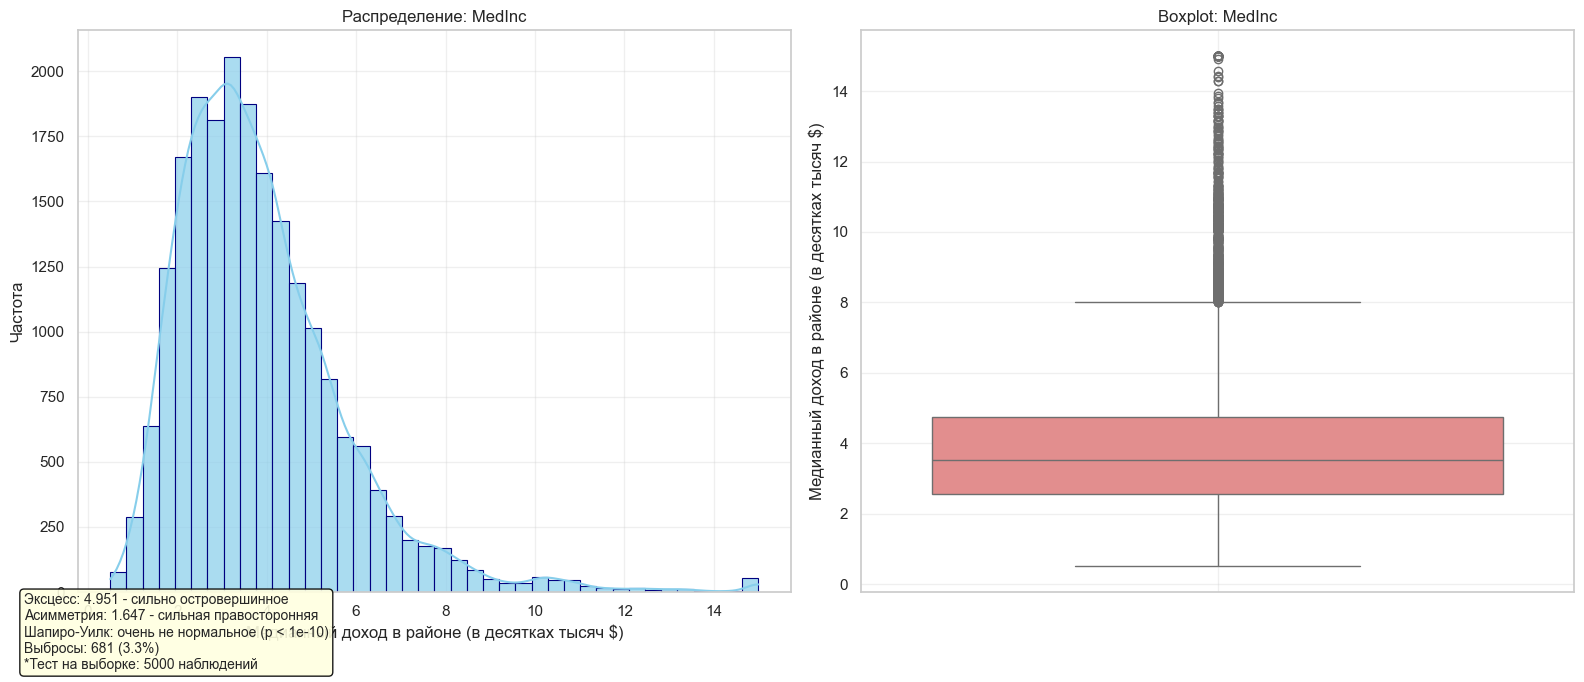

MedInc
Эксцесс: 4.951 - сильно островершинное
Асимметрия: 1.647 - сильная правосторонняя
Шапиро-Уилк: очень не нормальное (p < 1e-10)
p-value: 7.86e-51
Выбросы: 681 (3.3%)
------------------------------------------------------------



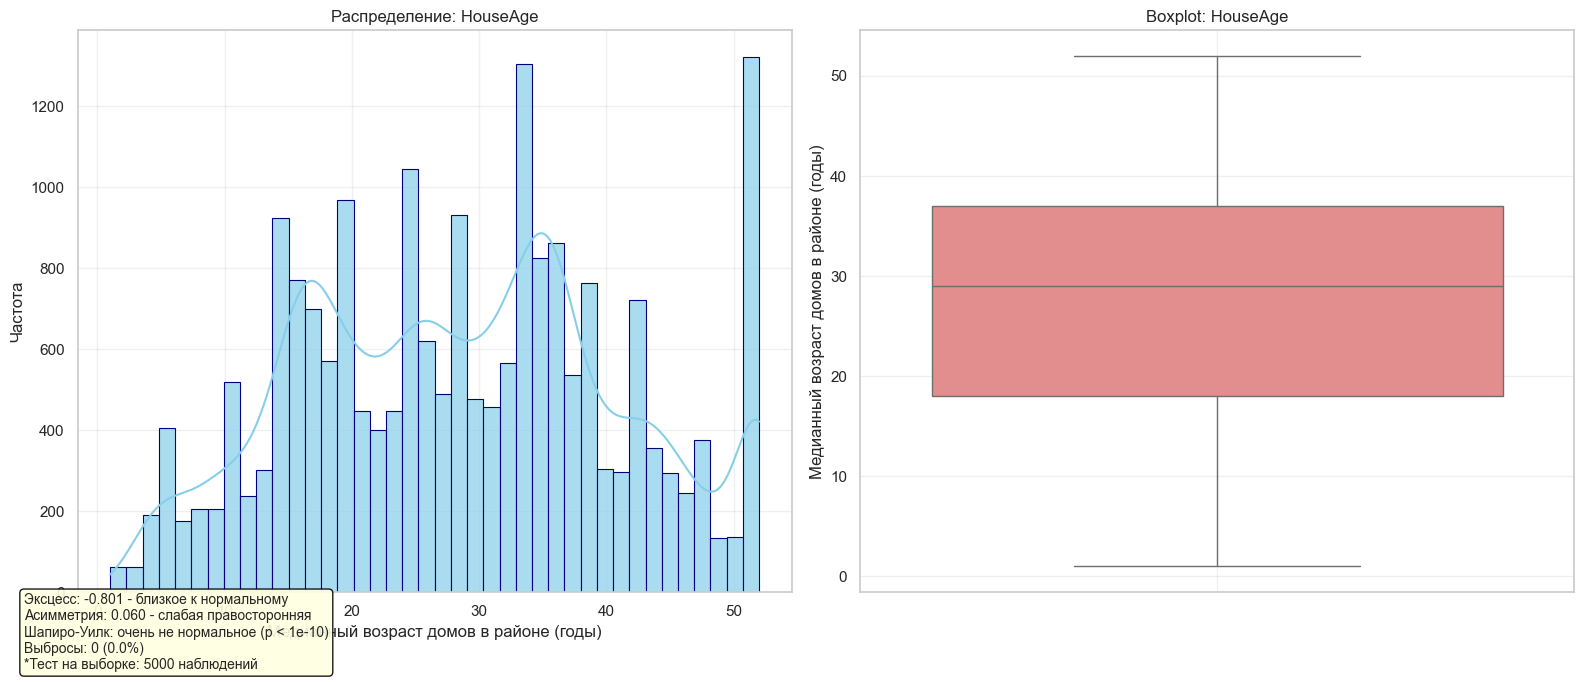

HouseAge
Эксцесс: -0.801 - близкое к нормальному
Асимметрия: 0.060 - слабая правосторонняя
Шапиро-Уилк: очень не нормальное (p < 1e-10)
p-value: 1.06e-26
Выбросы: 0 (0.0%)
------------------------------------------------------------



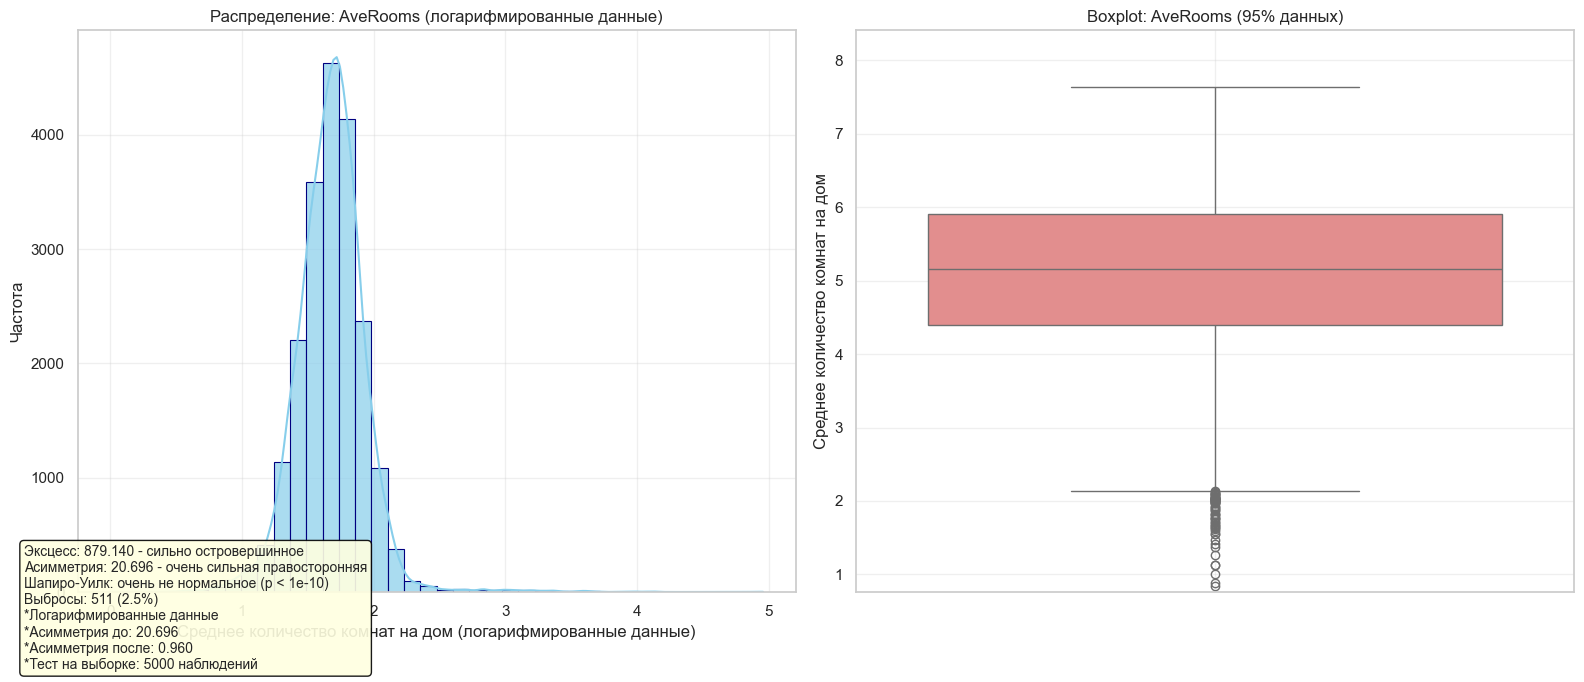

AveRooms
Эксцесс: 879.140 - сильно островершинное
Асимметрия: 20.696 - очень сильная правосторонняя
Шапиро-Уилк: очень не нормальное (p < 1e-10)
p-value: 1.35e-43
Выбросы: 511 (2.5%)
Логарифмирование улучшило асимметрию: 20.696 → 0.960
------------------------------------------------------------



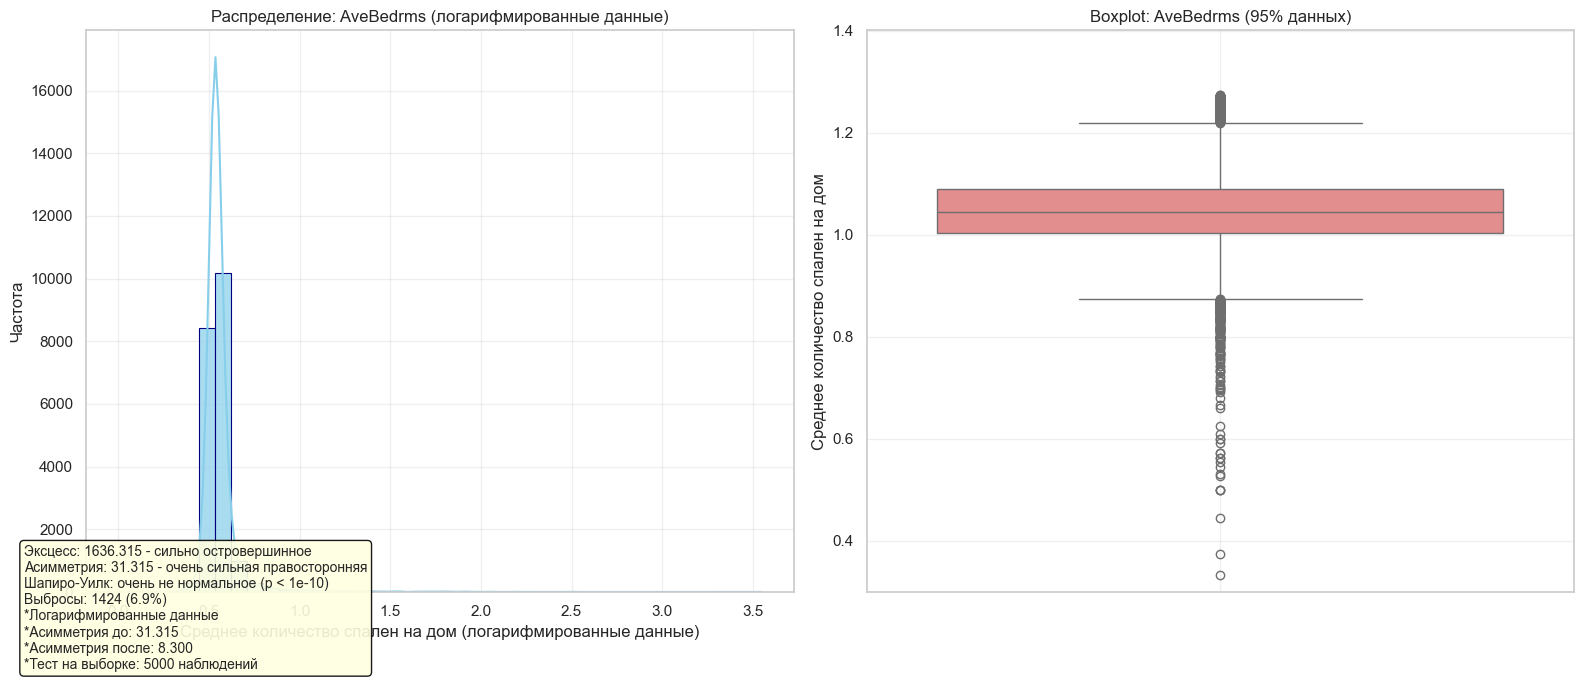

AveBedrms
Эксцесс: 1636.315 - сильно островершинное
Асимметрия: 31.315 - очень сильная правосторонняя
Шапиро-Уилк: очень не нормальное (p < 1e-10)
p-value: 9.83e-83
Выбросы: 1424 (6.9%)
Логарифмирование улучшило асимметрию: 31.315 → 8.300
------------------------------------------------------------



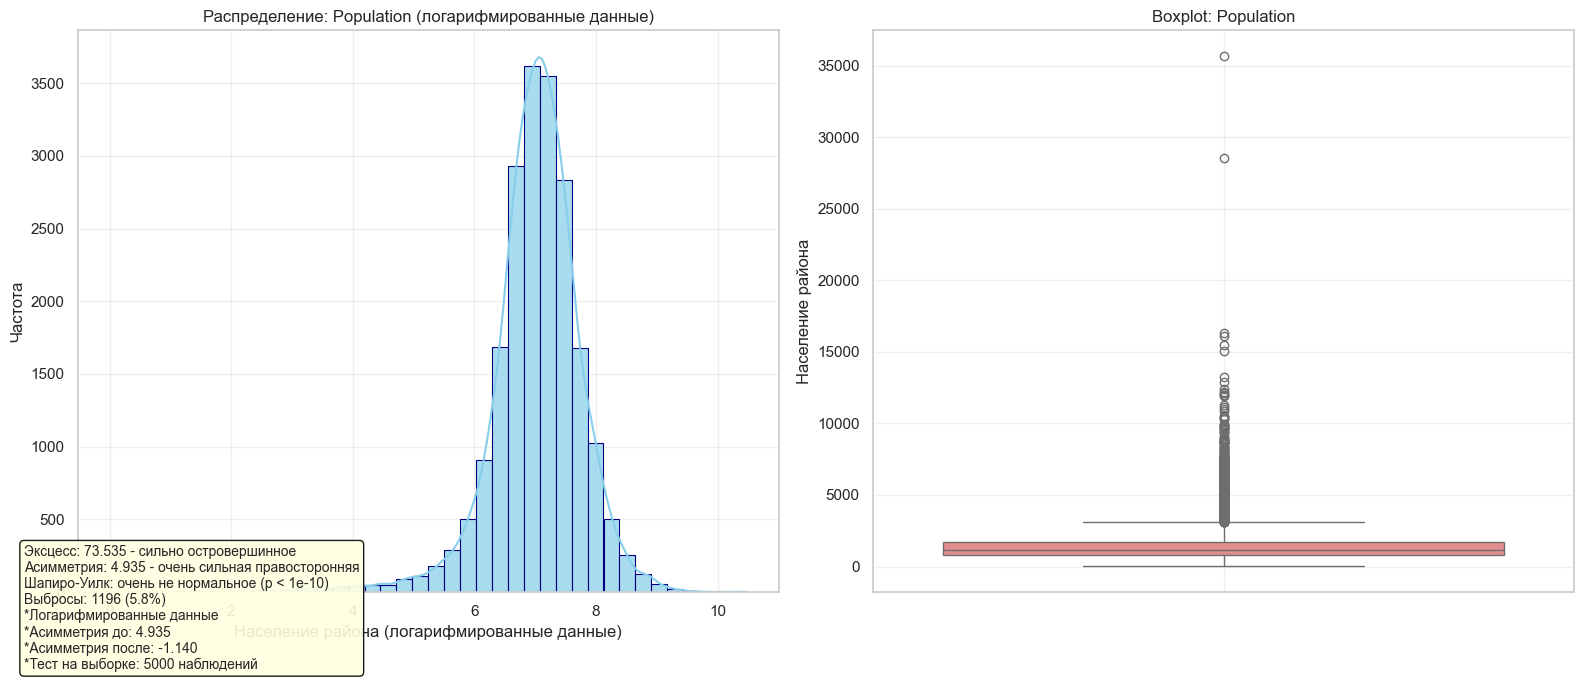

Population
Эксцесс: 73.535 - сильно островершинное
Асимметрия: 4.935 - очень сильная правосторонняя
Шапиро-Уилк: очень не нормальное (p < 1e-10)
p-value: 1.87e-41
Выбросы: 1196 (5.8%)
Логарифмирование улучшило асимметрию: 4.935 → -1.140
------------------------------------------------------------



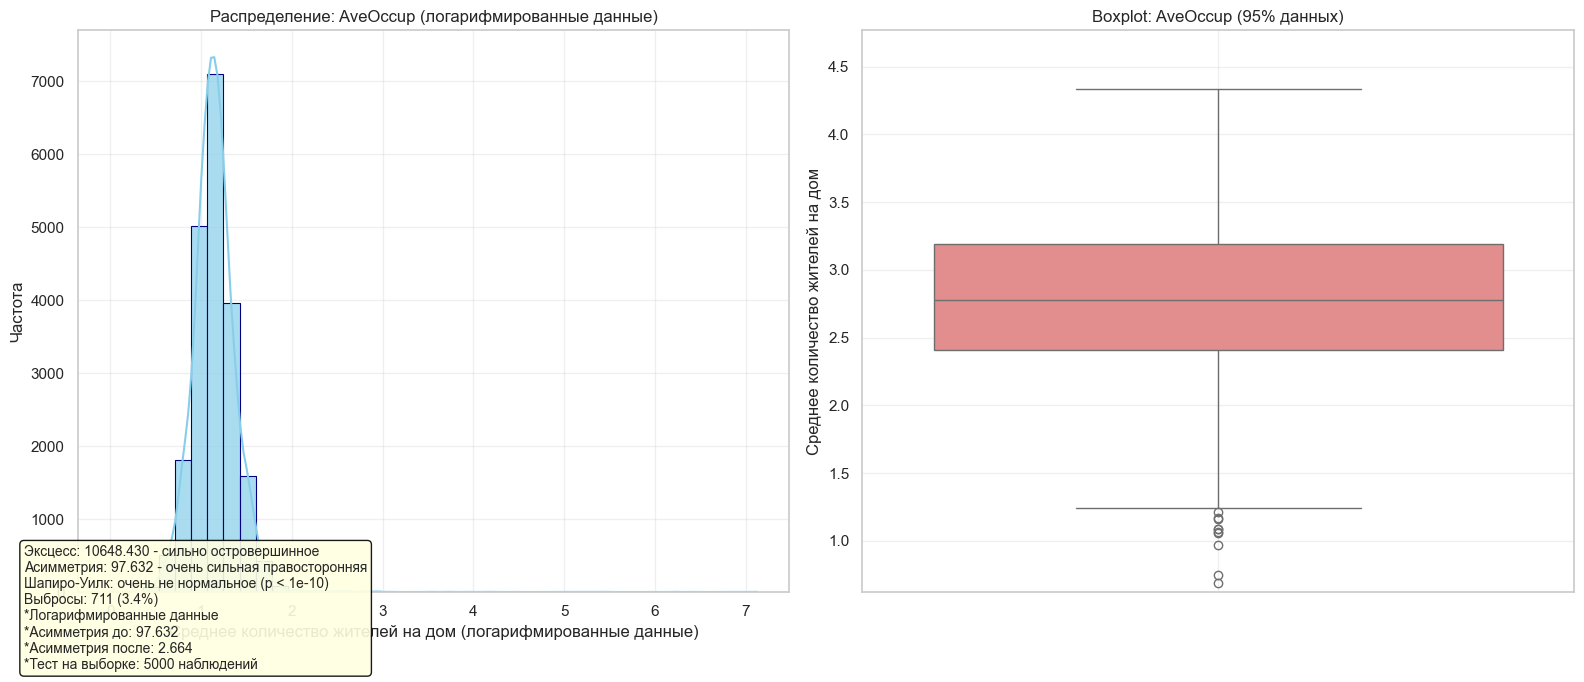

AveOccup
Эксцесс: 10648.430 - сильно островершинное
Асимметрия: 97.632 - очень сильная правосторонняя
Шапиро-Уилк: очень не нормальное (p < 1e-10)
p-value: 1.81e-39
Выбросы: 711 (3.4%)
Логарифмирование улучшило асимметрию: 97.632 → 2.664
------------------------------------------------------------



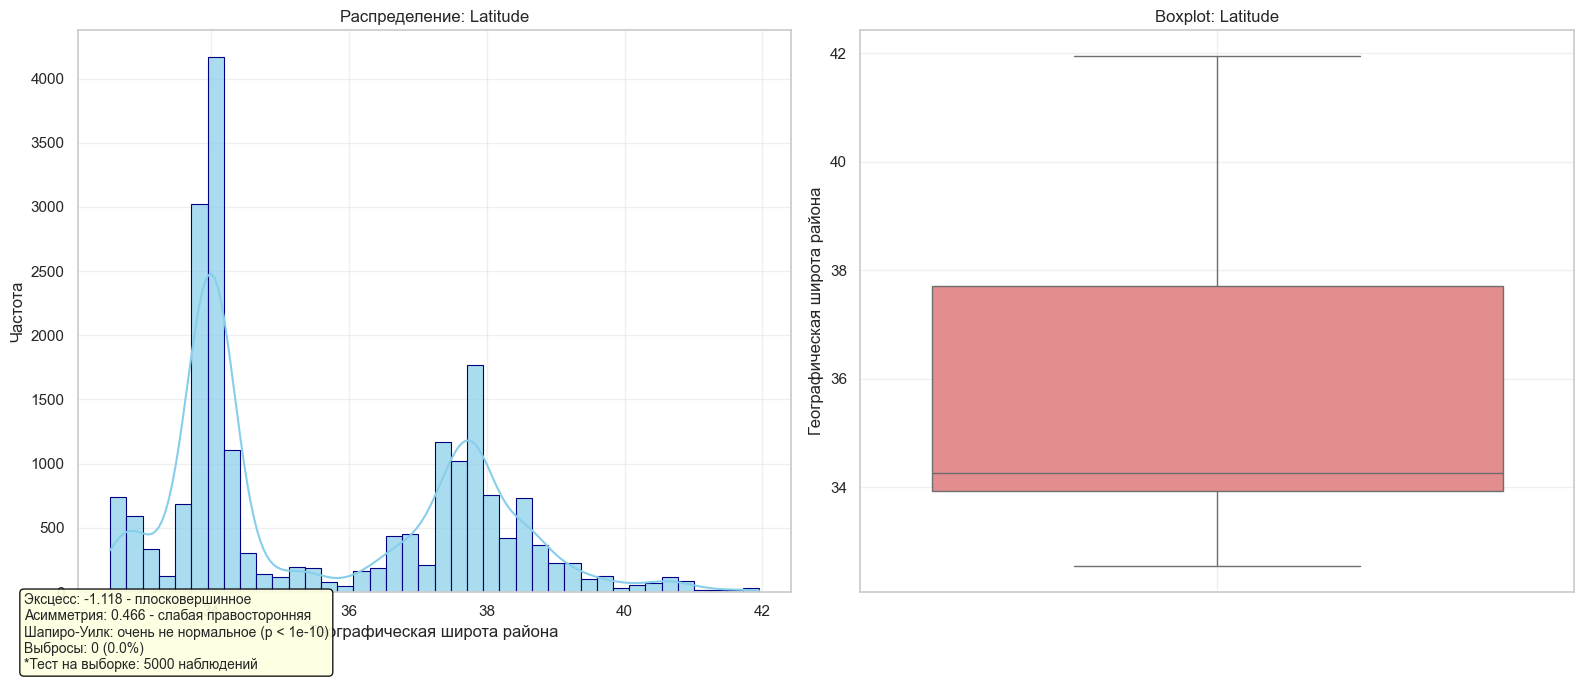

Latitude
Эксцесс: -1.118 - плосковершинное
Асимметрия: 0.466 - слабая правосторонняя
Шапиро-Уилк: очень не нормальное (p < 1e-10)
p-value: 4.90e-53
Выбросы: 0 (0.0%)
------------------------------------------------------------



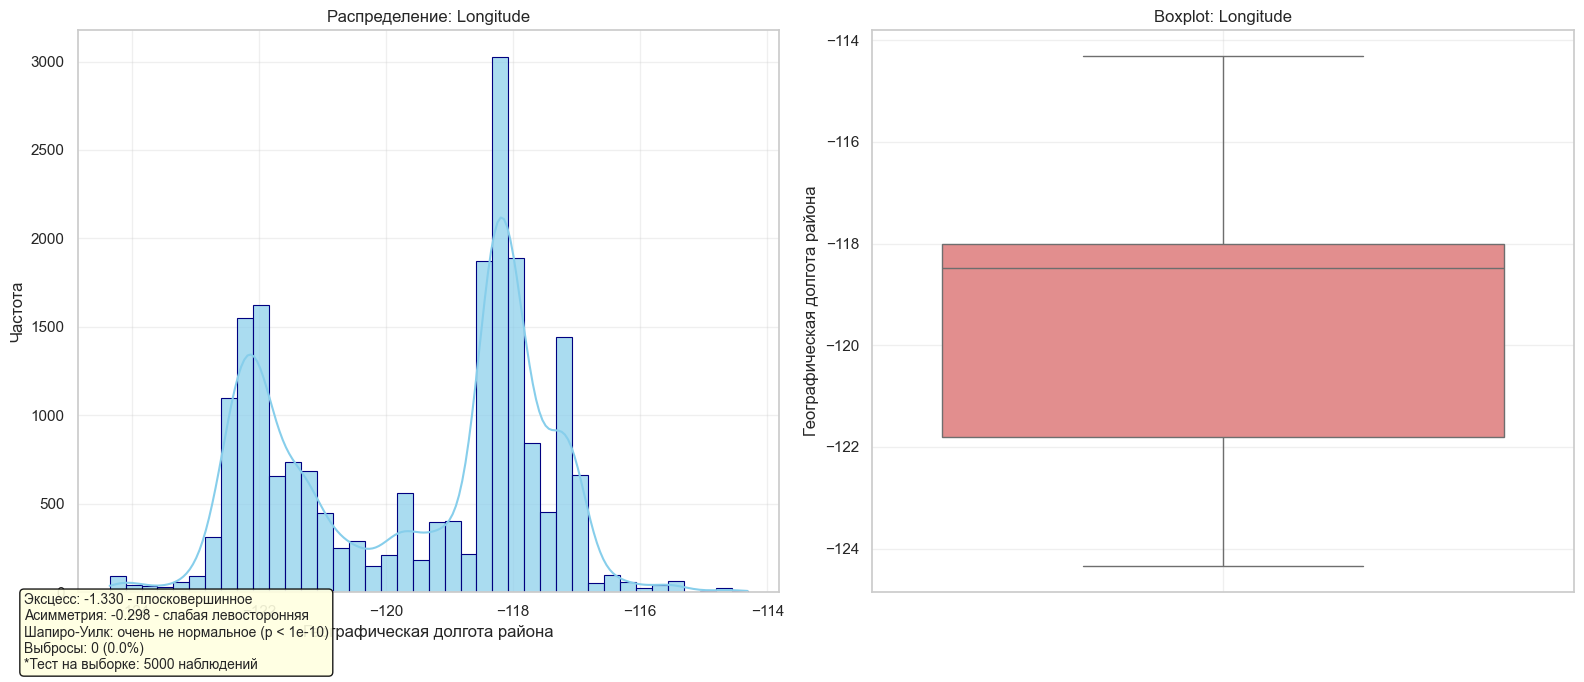

Longitude
Эксцесс: -1.330 - плосковершинное
Асимметрия: -0.298 - слабая левосторонняя
Шапиро-Уилк: очень не нормальное (p < 1e-10)
p-value: 1.35e-49
Выбросы: 0 (0.0%)
------------------------------------------------------------



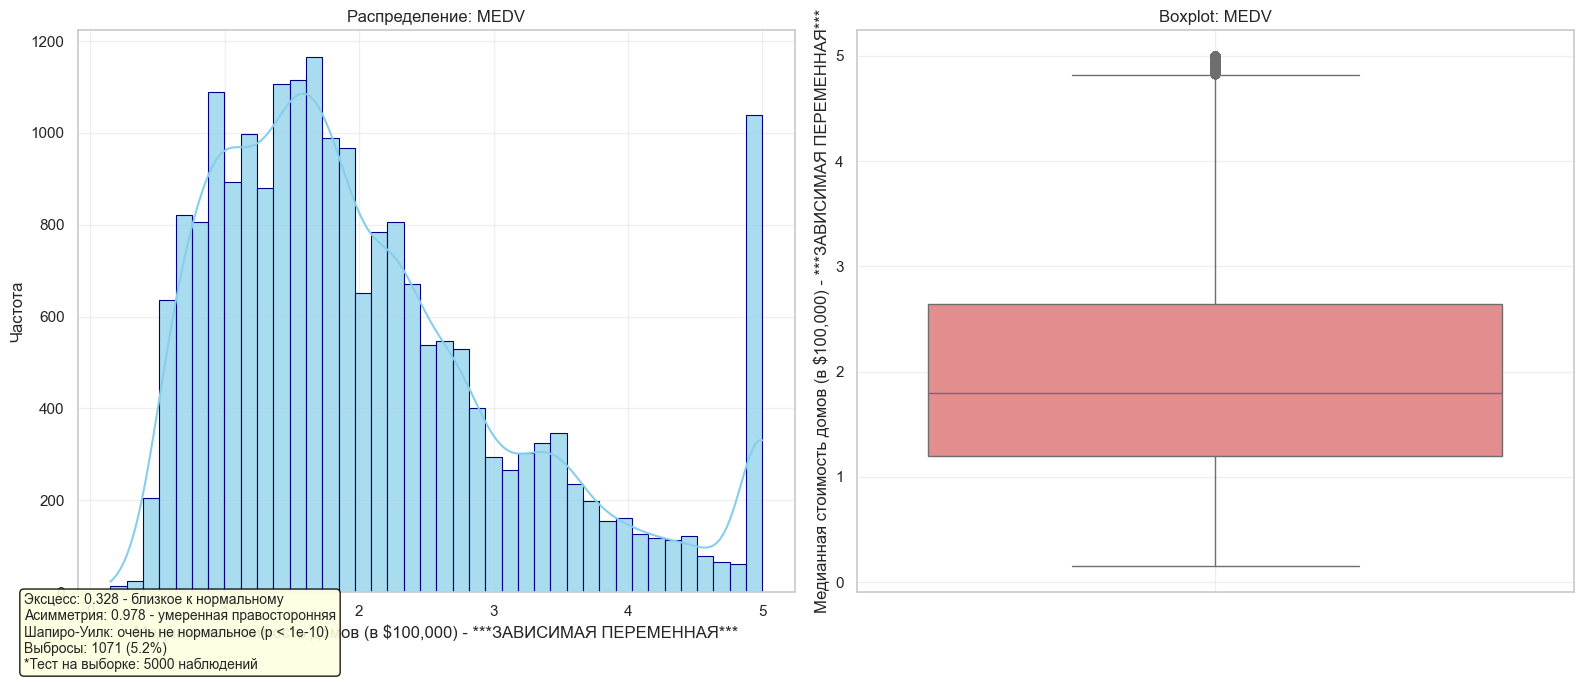

MEDV
Эксцесс: 0.328 - близкое к нормальному
Асимметрия: 0.978 - умеренная правосторонняя
Шапиро-Уилк: очень не нормальное (p < 1e-10)
p-value: 9.59e-47
Выбросы: 1071 (5.2%)
------------------------------------------------------------



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis, shapiro
import numpy as np

ALPHA = 0.05

descriptions = {
    'MedInc': 'Медианный доход в районе (в десятках тысяч $)',
    'HouseAge': 'Медианный возраст домов в районе (годы)',
    'AveRooms': 'Среднее количество комнат на дом',
    'AveBedrms': 'Среднее количество спален на дом', 
    'Population': 'Население района',
    'AveOccup': 'Среднее количество жителей на дом',
    'Latitude': 'Географическая широта района',
    'Longitude': 'Географическая долгота района',
    'MEDV': 'Медианная стоимость домов (в $100,000) - ***ЗАВИСИМАЯ ПЕРЕМЕННАЯ***'
}

def interpret_kurtosis(kurt):
    if kurt > 2:
        return f"{kurt:.3f} - сильно островершинное"
    elif kurt > 1:
        return f"{kurt:.3f} - островершинное"
    elif kurt < -1:
        return f"{kurt:.3f} - плосковершинное"
    else:
        return f"{kurt:.3f} - близкое к нормальному"

def interpret_skewness(skew_val):
    abs_skew = abs(skew_val)
    if abs_skew > 2:
        direction = "правосторонняя" if skew_val > 0 else "левосторонняя"
        return f"{skew_val:.3f} - очень сильная {direction}"
    elif abs_skew > 1:
        direction = "правосторонняя" if skew_val > 0 else "левосторонняя"
        return f"{skew_val:.3f} - сильная {direction}"
    elif abs_skew > 0.5:
        direction = "правосторонняя" if skew_val > 0 else "левосторонняя"
        return f"{skew_val:.3f} - умеренная {direction}"
    else:
        direction = "правосторонняя" if skew_val > 0 else "левосторонняя"
        return f"{skew_val:.3f} - слабая {direction}"

def interpret_normality_shapiro(p_value):
    """Интерпретация p-value с учетом ограничений теста"""
    if p_value < 1e-300: 
        return "крайне не нормальное (p ≈ 0)"
    elif p_value < 1e-10:
        return "очень не нормальное (p < 1e-10)"
    elif p_value >= ALPHA:
        return f"нормальное (p={p_value:.4f})"
    else:
        return f"не нормальное (p={p_value:.4f})"

def get_p_value_safe(data):
    """Безопасное вычисление p-value с обработкой экстремальных значений"""
    try:
        sample_size = min(5000, len(data))
        if len(data) > 5000:
            data_sample = data.sample(n=sample_size, random_state=42)
        else:
            data_sample = data
            
        shapiro_result = shapiro(data_sample)
        p_value = shapiro_result.pvalue
        
        if p_value < 1e-300:
            return 1e-300
        return p_value
        
    except Exception as e:
        return 0.0

print("АНАЛИЗ РАСПРЕДЕЛЕНИЙ:")
print("=" * 80)

for column in dataset.columns:
    plt.figure(figsize=(16, 8))

    Q1 = dataset[column].quantile(0.25)
    Q3 = dataset[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = len(dataset[column][(dataset[column] < lower_bound) | (dataset[column] > upper_bound)])
    
    current_skew = skew(dataset[column])
    if abs(current_skew) > 2:
        data_log = np.log1p(dataset[column] - dataset[column].min() + 0.001)
        skew_after_log = skew(data_log)
        use_log_transform = abs(skew_after_log) < abs(current_skew)
    else:
        use_log_transform = False
    
    if use_log_transform:
        data_for_hist = data_log
        transform_text = " (логарифмированные данные)"
        bins = min(40, int(len(data_for_hist) / 30))
        p_value = get_p_value_safe(data_log)
    elif current_skew > 5:
        data_for_hist = dataset[column][dataset[column] <= dataset[column].quantile(0.95)]
        transform_text = " (95% данных, без выбросов)"
        bins = min(30, int(len(data_for_hist) / 50))
        p_value = get_p_value_safe(data_for_hist)
    else:
        data_for_hist = dataset[column]
        transform_text = ""
        bins = min(40, int(len(data_for_hist) / 30))
        p_value = get_p_value_safe(dataset[column])
    
    plt.subplot(1, 2, 1)
    sns.histplot(data_for_hist, kde=True, bins=bins, alpha=0.7, 
                color='skyblue', edgecolor='navy', linewidth=0.8)
    
    kurtosis_val = kurtosis(dataset[column])
    skewness_val = skew(dataset[column])
    
    kurtosis_interpret = interpret_kurtosis(kurtosis_val)
    skewness_interpret = interpret_skewness(skewness_val)
    normality_interpret = interpret_normality_shapiro(p_value)
    
    legend_text = (f'Эксцесс: {kurtosis_interpret}\n'
                   f'Асимметрия: {skewness_interpret}\n'
                   f'Шапиро-Уилк: {normality_interpret}\n'
                   f'Выбросы: {outliers} ({outliers/len(dataset[column])*100:.1f}%)')
    
    if use_log_transform:
        legend_text += f'\n*Логарифмированные данные'
        legend_text += f'\n*Асимметрия до: {current_skew:.3f}'
        legend_text += f'\n*Асимметрия после: {skew_after_log:.3f}'
    elif current_skew > 5:
        legend_text += f'\n*Показаны 95% данных'
    
    sample_size = min(5000, len(dataset[column]))
    if len(dataset[column]) > 5000:
        legend_text += f'\n*Тест на выборке: {sample_size} наблюдений'
    
    plt.figtext(0.02, 0.15, legend_text, 
                ha='left', va='bottom', fontsize=10,
                bbox=dict(boxstyle='round', facecolor='lightyellow', 
                         edgecolor='black', linewidth=1, alpha=0.9))
    
    plt.title(f'Распределение: {column}{transform_text}')
    plt.xlabel(descriptions[column] + transform_text)
    plt.ylabel('Частота')
    plt.grid(True, alpha=0.3)

    # Boxplot
    plt.subplot(1, 2, 2)
    if current_skew > 5:
        y_limit = dataset[column].quantile(0.95)
        data_for_box = dataset[column][dataset[column] <= y_limit]
        sns.boxplot(y=data_for_box, color='lightcoral')
        plt.ylim(data_for_box.min() * 0.9, y_limit * 1.1)
        plt.title(f'Boxplot: {column} (95% данных)')
    else:
        sns.boxplot(y=dataset[column], color='lightcoral')
        plt.title(f'Boxplot: {column}')
    
    plt.ylabel(descriptions[column])
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.25)
    plt.show()
    
    print(f"{column}")
    print(f"Эксцесс: {kurtosis_interpret}")
    print(f"Асимметрия: {skewness_interpret}")
    print(f"Шапиро-Уилк: {normality_interpret}")
    print(f"p-value: {p_value:.2e}")
    print(f"Выбросы: {outliers} ({outliers/len(dataset[column])*100:.1f}%)")
    if use_log_transform:
        print(f"Логарифмирование улучшило асимметрию: {current_skew:.3f} → {skew_after_log:.3f}")
    print("-" * 60)
    print()

# АНАЛИЗ РАСПРЕДЕЛЕНИЙ ПРИЗНАКОВ

## Общая характеристика данных

Данные демонстрируют **сильные отклонения от нормального распределения** для большинства признаков. Все p-value теста Шапиро-Уилка значительно меньше 0.05, что указывает на ненормальность распределений.

## Детальный анализ по признакам

### **MedInc (Медианный доход)**
- **Эксцесс 4.951** - сильно островершинное распределение
- **Асимметрия 1.647** - сильная правосторонняя асимметрия
- **Выбросы 3.3%** - умеренное количество выбросов
- **Интерпретация**: Доходы распределены неравномерно с преобладанием средних и низких значений

### **HouseAge (Возраст домов)**
- **Эксцесс -0.801** - близкое к нормальному
- **Асимметрия 0.060** - практически симметричное распределение  
- **Выбросы 0.0%** - отсутствие выбросов
- **Интерпретация**: Наиболее нормально распределенный признак

### **AveRooms (Среднее количество комнат)**
- **Эксцесс 879.140** - экстремально островершинное
- **Асимметрия 20.696** - катастрофическая правосторонняя асимметрия
- **Выбросы 2.5%** - присутствуют экстремальные значения
- **Логарифмирование**: Улучшило асимметрию с 20.696 до 0.960
- **Интерпретация**: Сильно искаженное распределение с редкими случаями огромного количества комнат

### **AveBedrms (Среднее количество спален)**
- **Эксцесс 1636.315** - рекордное островершинное распределение
- **Асимметрия 31.315** - экстремальная правосторонняя асимметрия
- **Выбросы 6.9%** - наибольший процент выбросов
- **Логарифмирование**: Частично улучшило асимметрию (31.315 → 8.300)
- **Интерпретация**: Наиболее проблемный признак с аномальными значениями

### **Population (Население)**
- **Эксцесс 73.535** - сильно островершинное
- **Асимметрия 4.935** - очень сильная правосторонняя
- **Выбросы 5.8%** - значительное количество выбросов
- **Логарифмирование**: Улучшило асимметрию и изменило направление (4.935 → -1.140)
- **Интерпретация**: Неравномерное распределение населения по районам

### **AveOccup (Средняя заполняемость)**
- **Эксцесс 10648.430** - катастрофически островершинное
- **Асимметрия 97.632** - экстремальная правосторонняя асимметрия
- **Выбросы 3.4%** - присутствуют аномальные значения
- **Логарифмирование**: Значительно улучшило асимметрию (97.632 → 2.664)
- **Интерпретация**: Сильно искаженное распределение с редкими случаями экстремальной заполняемости

### **Latitude/Longitude (Координаты)**
- **Эксцесс ≈ -1.3** - плосковершинные распределения
- **Асимметрия ≈ ±0.4** - слабая асимметрия
- **Выбросы 0.0%** - отсутствие выбросов
- **Интерпретация**: Равномерное распределение географических координат

### **MEDV (Цена домов) - целевая переменная**
- **Эксцесс 0.328** - близкое к нормальному
- **Асимметрия 0.978** - умеренная правосторонняя асимметрия
- **Выбросы 5.2%** - значительное количество выбросов
- **Интерпретация**: Относительно нормальное распределение с тенденцией к более высоким ценам

## Ключевые выводы

### **Критически проблемные признаки:**

**AveRooms (комнаты):**
- Эксцесс 879 → **катастрофически тяжелые хвосты**
- Асимметрия 20.7 → **экстремальный перекос вправо**
- Логарифмирование: 20.7 → 0.96 **значительное улучшение**

**AveBedrms (спальни):**
- Эксцесс 1636 → **рекордно тяжелые хвосты** 
- Асимметрия 31.3 → **катастрофический перекос**
- Логарифмирование: 31.3 → 8.3 **недостаточное улучшение**

**AveOccup (заполняемость):**
- Эксцесс 10648 → **катастрофическое распределение**
- Асимметрия 97.6 → **экстремальный перекос**
- Логарифмирование: 97.6 → 2.7 **значительное улучшение**

### **Проблемные признаки:**

**Population (население):**
- Эксцесс 73.5 → **очень тяжелые хвосты**
- Асимметрия 4.9 → **сильный перекос**
- Логарифмирование: 4.9 → -1.1 **улучшение + смена направления**

**MedInc (доход):**
- Эксцесс 4.95 → **тяжелые хвосты**
- Асимметрия 1.65 → **сильный перекос**

### **Относительно нормальные признаки:**

**HouseAge (возраст домов):**
- Эксцесс -0.8 → **близко к нормальному**
- Асимметрия 0.06 → **практически симметрично**
- Но p-value 1e-26 **статистически не нормально**

**MEDV (цена):**
- Эксцесс 0.33 → **близко к нормальному**  
- Асимметрия 0.98 → **умеренный перекос**


УДАЛЕНИЕ ВЫБРОСОВ - IQR МЕТОД
Исходный размер датасета: 20640
Размер после очистки: 16232
Всего удалено записей: 4408 (21.4%)

Детали по признакам:
  MedInc       -  681 выбросов (  3.3%)
  HouseAge     -    0 выбросов (  0.0%)
  AveRooms     -  439 выбросов (  2.1%)
  AveBedrms    - 1116 выбросов (  5.4%)
  Population   - 1063 выбросов (  5.2%)
  AveOccup     -  528 выбросов (  2.6%)
  Latitude     -    0 выбросов (  0.0%)
  Longitude    -    0 выбросов (  0.0%)
  MEDV         -  581 выбросов (  2.8%)

АНАЛИЗ РАСПРЕДЕЛЕНИЙ ПОСЛЕ УДАЛЕНИЯ ВЫБРОСОВ:


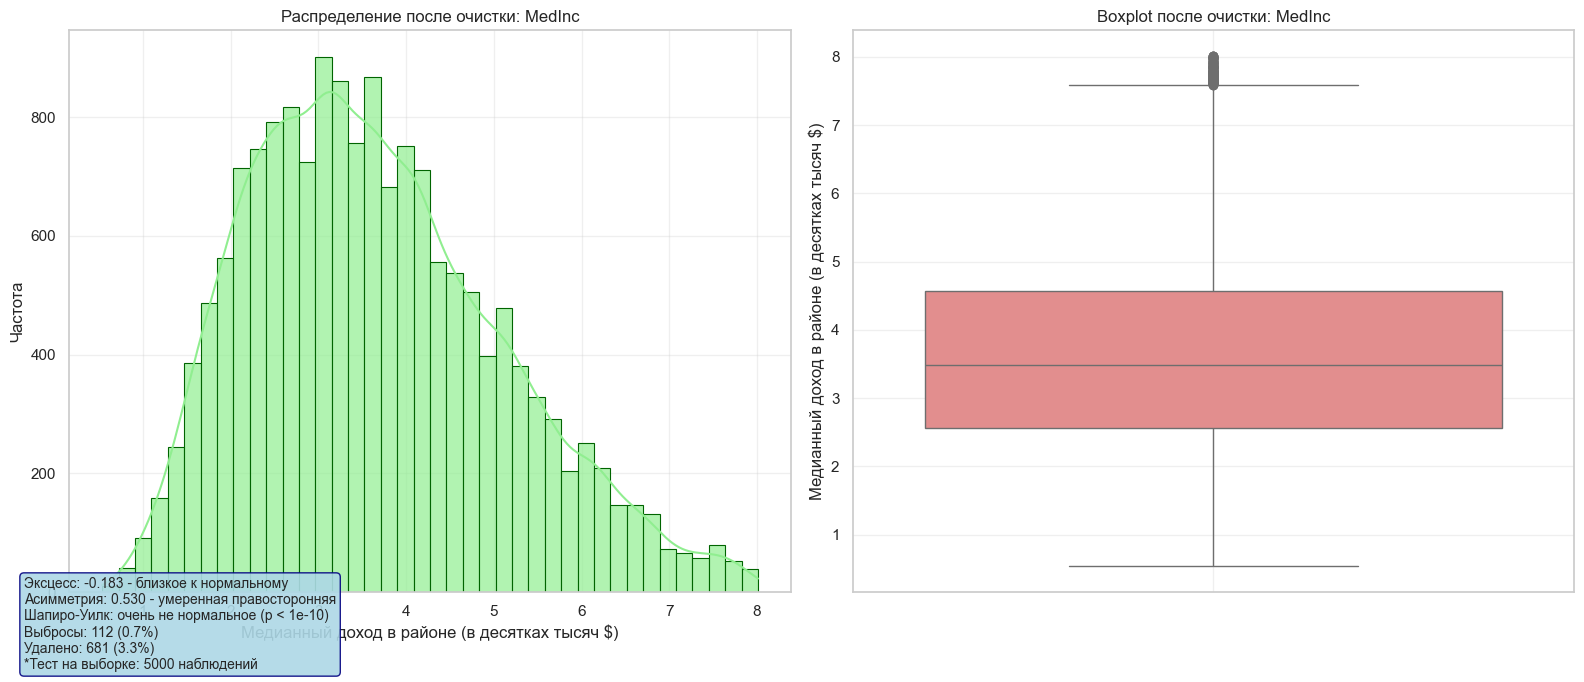

MedInc
Эксцесс: -0.183 - близкое к нормальному
Асимметрия: 0.530 - умеренная правосторонняя
Шапиро-Уилк: очень не нормальное (p < 1e-10)
p-value: 9.25e-30
Выбросы ДО очистки: 681 (3.3%)
Выбросы ПОСЛЕ очистки: 112 (0.7%)
Удалено выбросов: 681 (3.3%)
------------------------------------------------------------



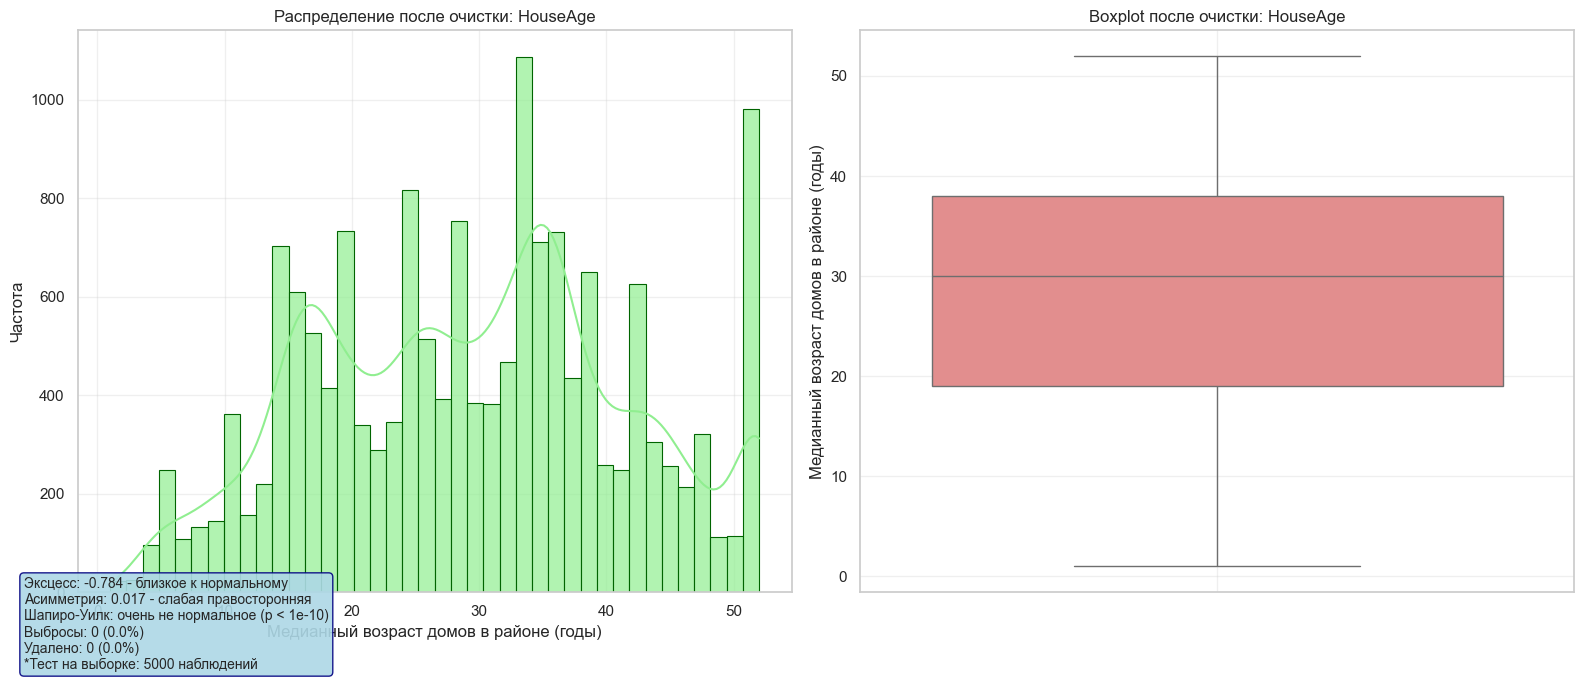

HouseAge
Эксцесс: -0.784 - близкое к нормальному
Асимметрия: 0.017 - слабая правосторонняя
Шапиро-Уилк: очень не нормальное (p < 1e-10)
p-value: 2.12e-26
Выбросы ДО очистки: 0 (0.0%)
Выбросы ПОСЛЕ очистки: 0 (0.0%)
Удалено выбросов: 0 (0.0%)
------------------------------------------------------------



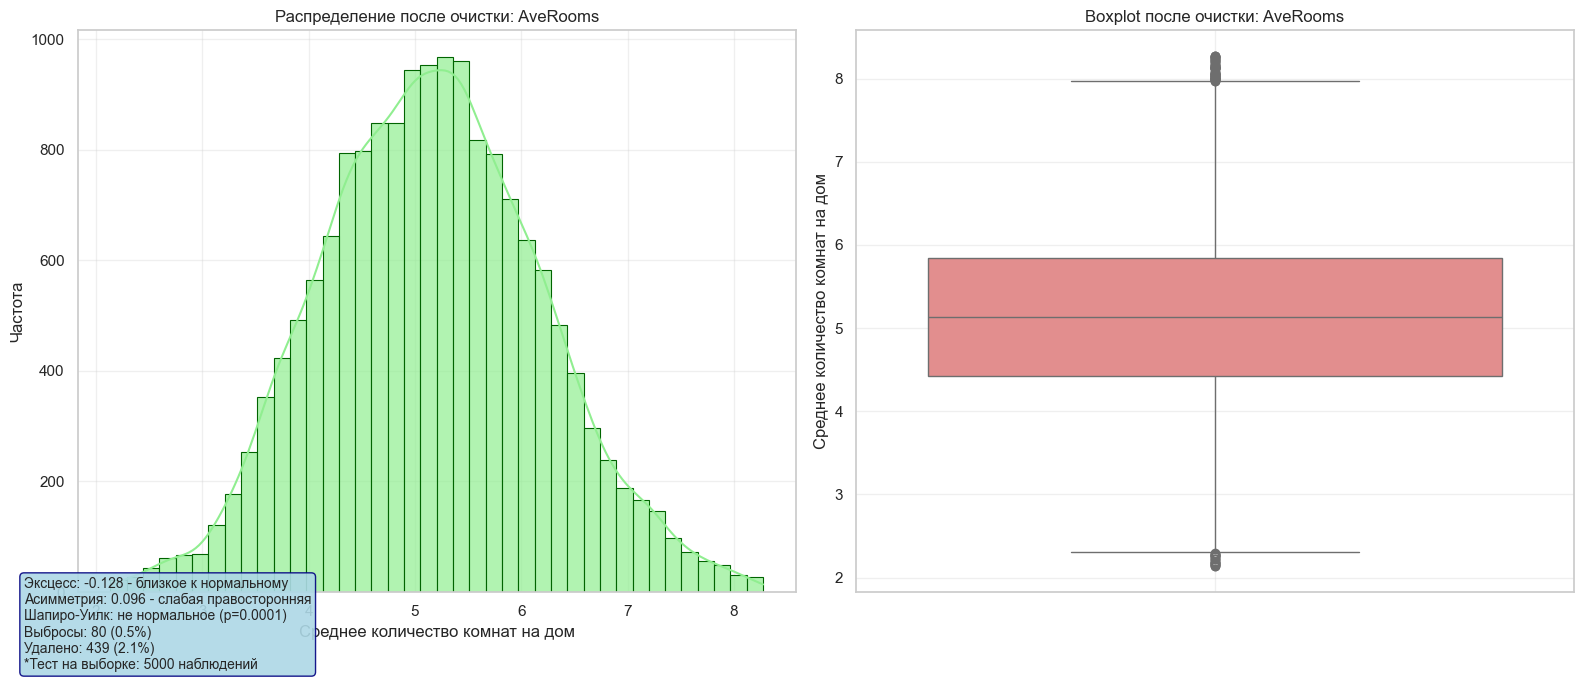

AveRooms
Эксцесс: -0.128 - близкое к нормальному
Асимметрия: 0.096 - слабая правосторонняя
Шапиро-Уилк: не нормальное (p=0.0001)
p-value: 5.91e-05
Выбросы ДО очистки: 511 (2.5%)
Выбросы ПОСЛЕ очистки: 80 (0.5%)
Удалено выбросов: 439 (2.1%)
------------------------------------------------------------



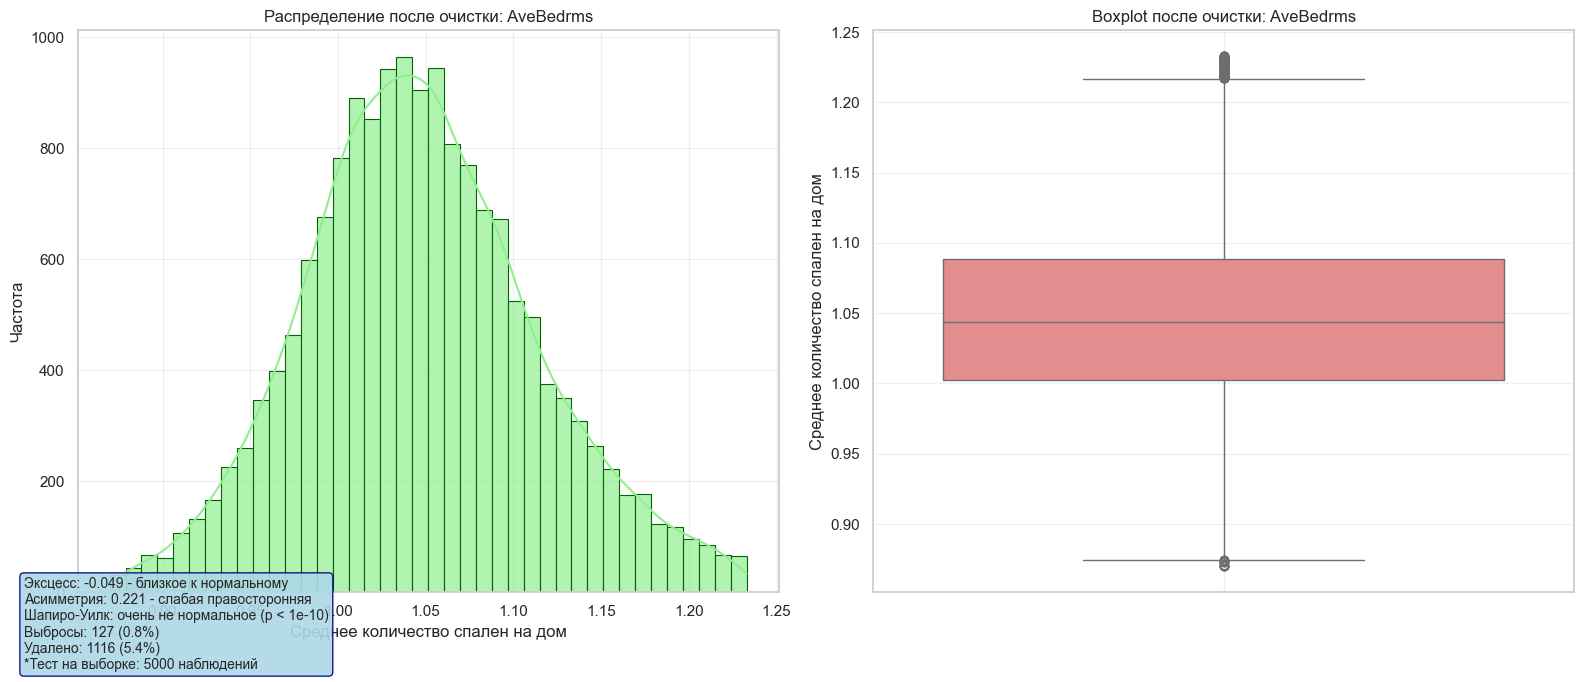

AveBedrms
Эксцесс: -0.049 - близкое к нормальному
Асимметрия: 0.221 - слабая правосторонняя
Шапиро-Уилк: очень не нормальное (p < 1e-10)
p-value: 2.36e-13
Выбросы ДО очистки: 1424 (6.9%)
Выбросы ПОСЛЕ очистки: 127 (0.8%)
Удалено выбросов: 1116 (5.4%)
------------------------------------------------------------



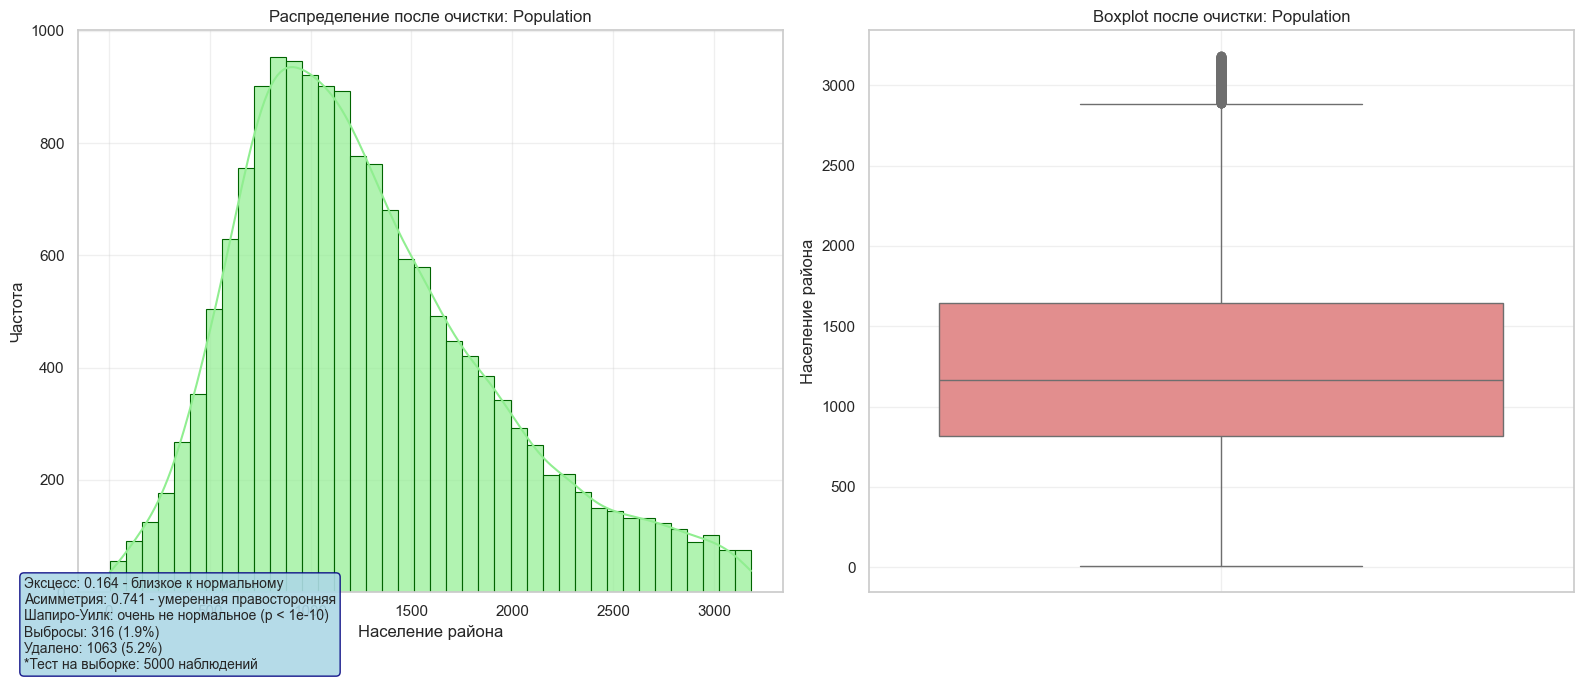

Population
Эксцесс: 0.164 - близкое к нормальному
Асимметрия: 0.741 - умеренная правосторонняя
Шапиро-Уилк: очень не нормальное (p < 1e-10)
p-value: 5.70e-36
Выбросы ДО очистки: 1196 (5.8%)
Выбросы ПОСЛЕ очистки: 316 (1.9%)
Удалено выбросов: 1063 (5.2%)
------------------------------------------------------------



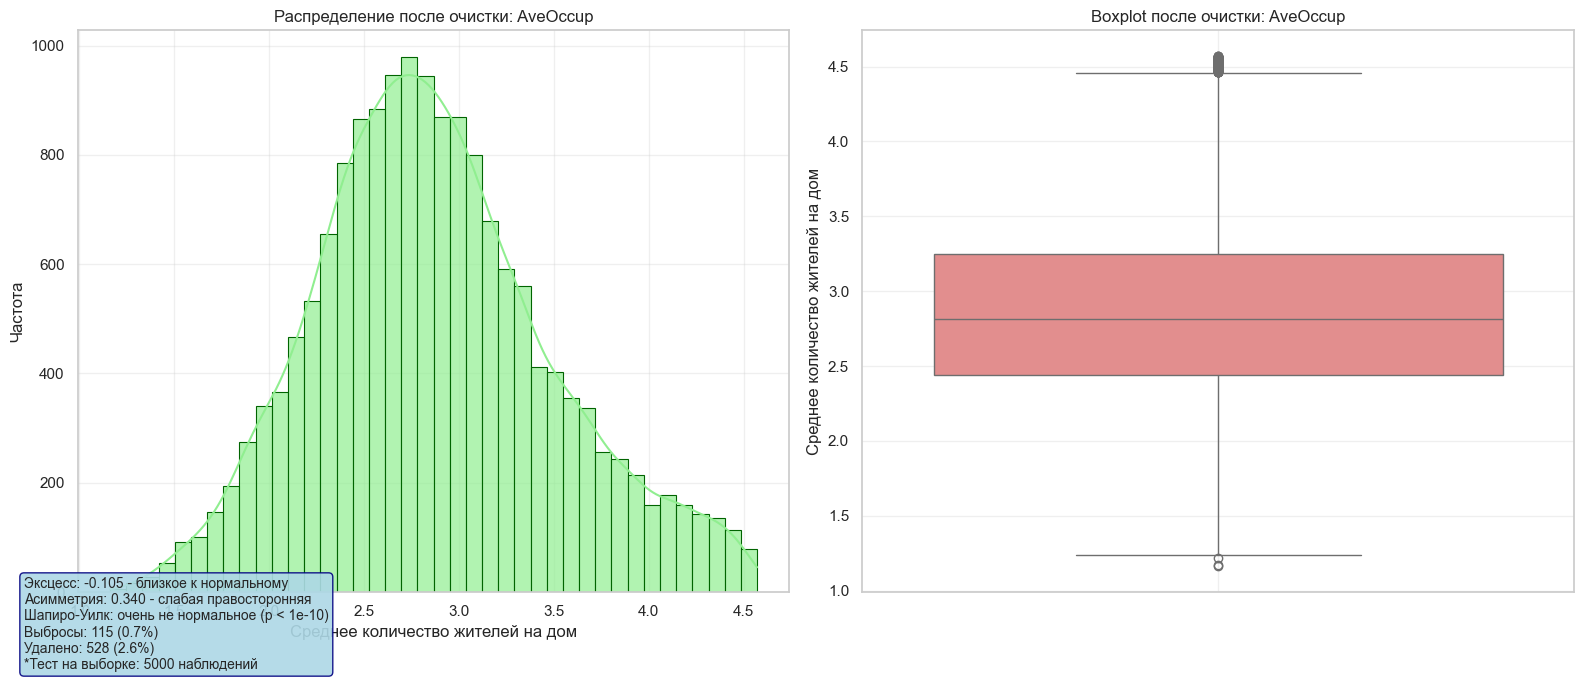

AveOccup
Эксцесс: -0.105 - близкое к нормальному
Асимметрия: 0.340 - слабая правосторонняя
Шапиро-Уилк: очень не нормальное (p < 1e-10)
p-value: 2.31e-17
Выбросы ДО очистки: 711 (3.4%)
Выбросы ПОСЛЕ очистки: 115 (0.7%)
Удалено выбросов: 528 (2.6%)
------------------------------------------------------------



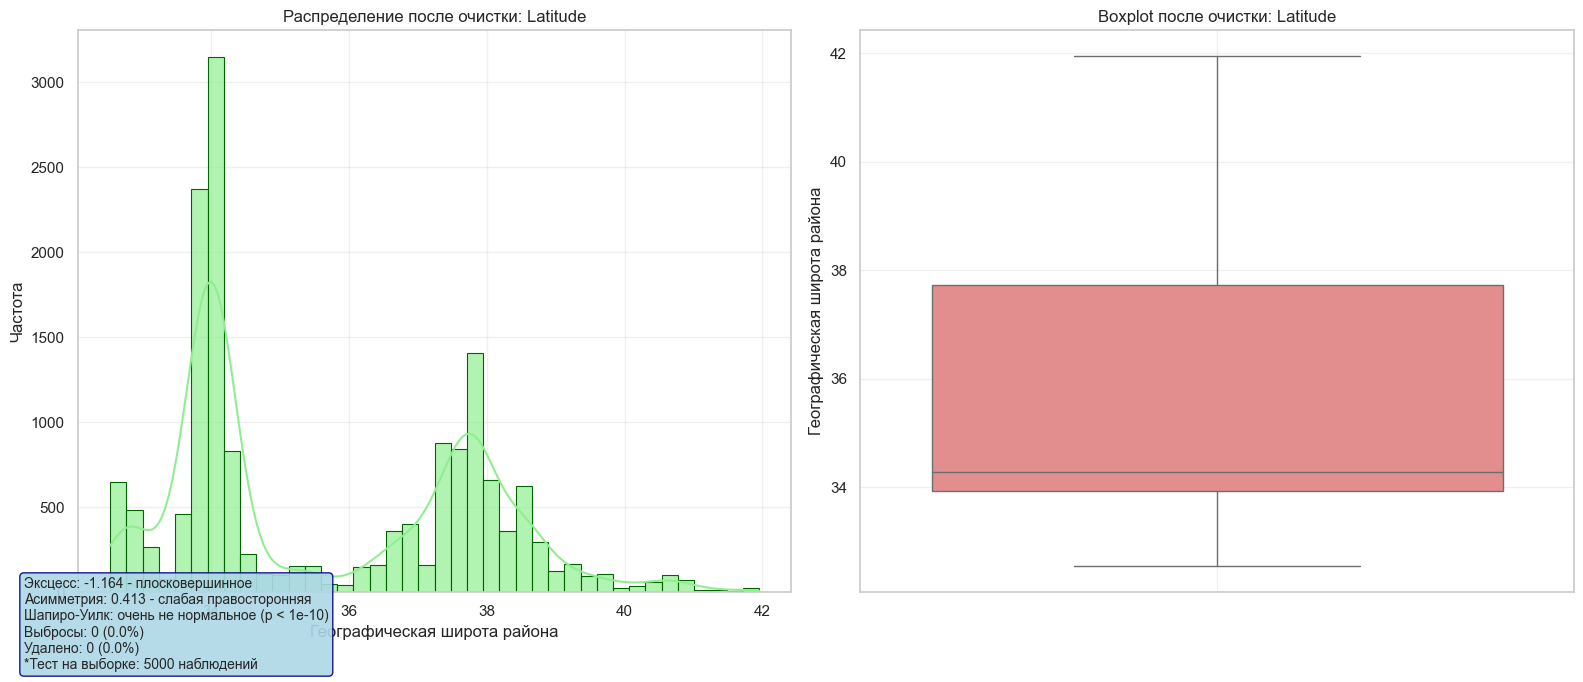

Latitude
Эксцесс: -1.164 - плосковершинное
Асимметрия: 0.413 - слабая правосторонняя
Шапиро-Уилк: очень не нормальное (p < 1e-10)
p-value: 1.69e-52
Выбросы ДО очистки: 0 (0.0%)
Выбросы ПОСЛЕ очистки: 0 (0.0%)
Удалено выбросов: 0 (0.0%)
------------------------------------------------------------



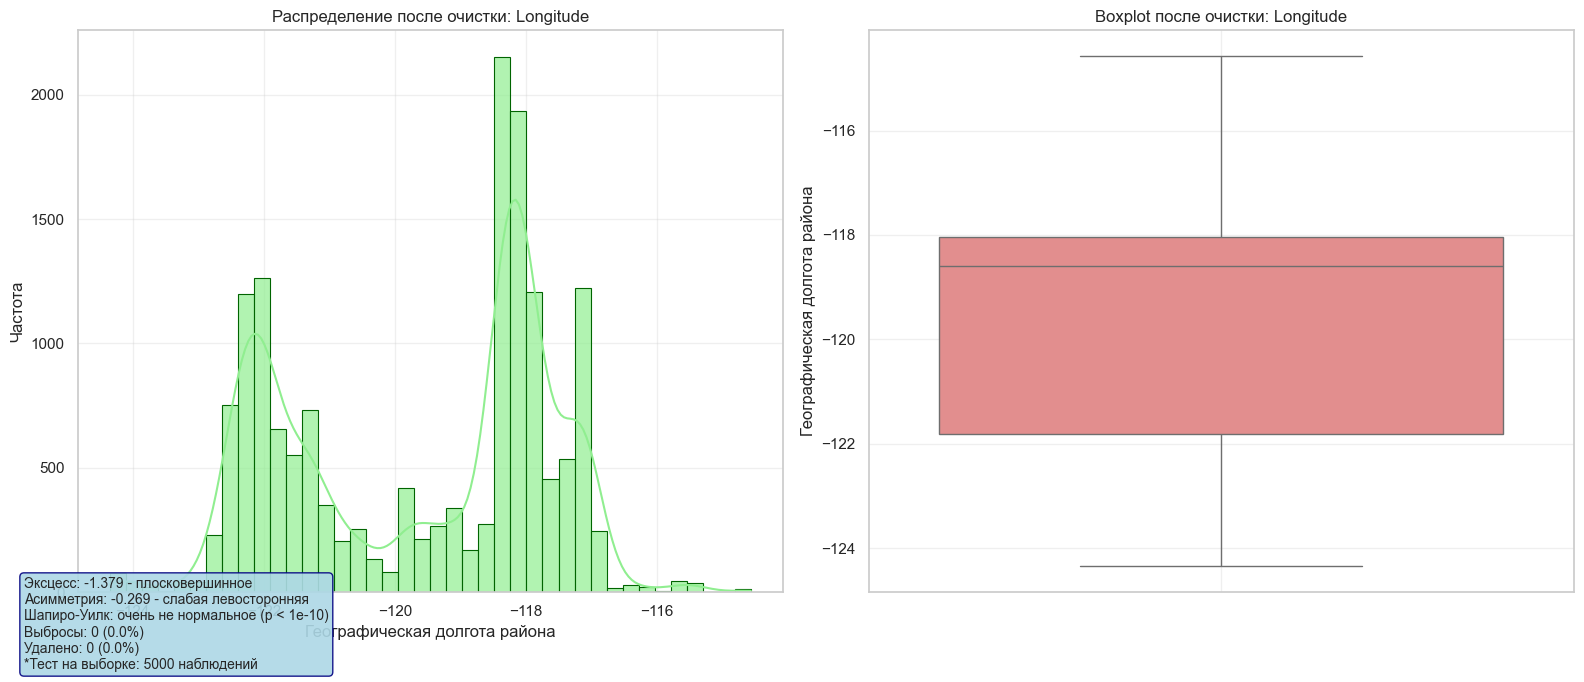

Longitude
Эксцесс: -1.379 - плосковершинное
Асимметрия: -0.269 - слабая левосторонняя
Шапиро-Уилк: очень не нормальное (p < 1e-10)
p-value: 1.40e-50
Выбросы ДО очистки: 0 (0.0%)
Выбросы ПОСЛЕ очистки: 0 (0.0%)
Удалено выбросов: 0 (0.0%)
------------------------------------------------------------



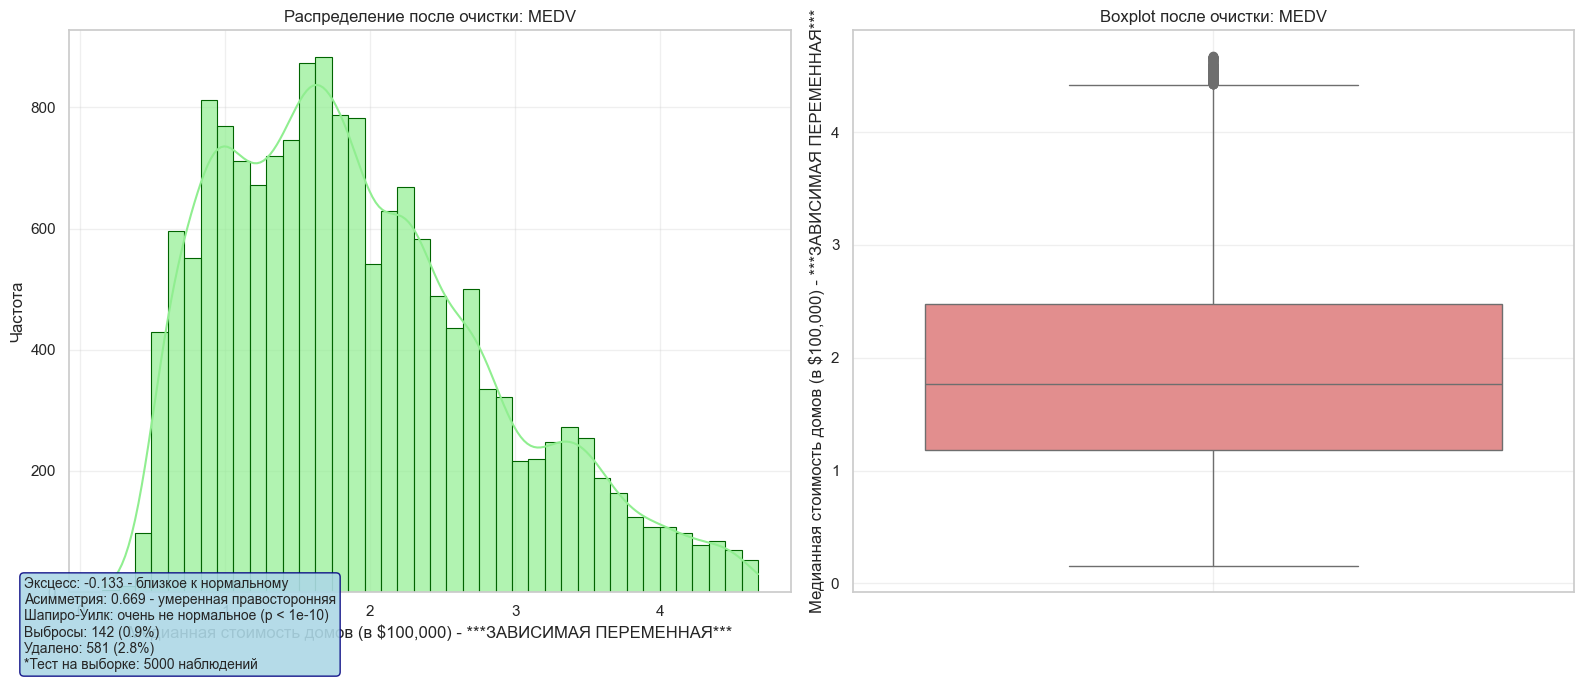

MEDV
Эксцесс: -0.133 - близкое к нормальному
Асимметрия: 0.669 - умеренная правосторонняя
Шапиро-Уилк: очень не нормальное (p < 1e-10)
p-value: 1.62e-35
Выбросы ДО очистки: 1071 (5.2%)
Выбросы ПОСЛЕ очистки: 142 (0.9%)
Удалено выбросов: 581 (2.8%)
------------------------------------------------------------

Очищенный датасет сохранен в переменной 'dataset_clean'
Исходный размер: 20640 записей
Очищенный размер: 16232 записей
Удалено: 4408 записей (21.4%)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis, shapiro
import numpy as np
import pandas as pd

ALPHA = 0.05

descriptions = {
    'MedInc': 'Медианный доход в районе (в десятках тысяч $)',
    'HouseAge': 'Медианный возраст домов в районе (годы)',
    'AveRooms': 'Среднее количество комнат на дом',
    'AveBedrms': 'Среднее количество спален на дом', 
    'Population': 'Население района',
    'AveOccup': 'Среднее количество жителей на дом',
    'Latitude': 'Географическая широта района',
    'Longitude': 'Географическая долгота района',
    'MEDV': 'Медианная стоимость домов (в $100,000) - ***ЗАВИСИМАЯ ПЕРЕМЕННАЯ***'
}

def remove_outliers_iqr(df, columns=None):
    """
    Удаляет выбросы используя метод IQR
    """
    if columns is None:
        columns = df.columns
    
    df_clean = df.copy()
    initial_size = len(df_clean)
    outliers_removed = {}
    
    for column in columns:
        Q1 = df_clean[column].quantile(0.25)
        Q3 = df_clean[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers_count = len(df_clean[(df_clean[column] < lower_bound) | (df_clean[column] > upper_bound)])
        
        mask = (df_clean[column] >= lower_bound) & (df_clean[column] <= upper_bound)
        df_clean = df_clean[mask]
        
        outliers_removed[column] = {
            'count': outliers_count,
            'percentage': (outliers_count / initial_size) * 100,
            'lower_bound': lower_bound,
            'upper_bound': upper_bound
        }
    
    final_size = len(df_clean)
    total_removed = initial_size - final_size
    
    print("=" * 70)
    print("УДАЛЕНИЕ ВЫБРОСОВ - IQR МЕТОД")
    print("=" * 70)
    print(f"Исходный размер датасета: {initial_size}")
    print(f"Размер после очистки: {final_size}")
    print(f"Всего удалено записей: {total_removed} ({total_removed/initial_size*100:.1f}%)")
    print("\nДетали по признакам:")
    for col, info in outliers_removed.items():
        print(f"  {col:12} - {info['count']:4d} выбросов ({info['percentage']:5.1f}%)")
    print("=" * 70)
    print()
    
    return df_clean, outliers_removed

def interpret_kurtosis(kurt):
    if kurt > 2:
        return f"{kurt:.3f} - сильно островершинное"
    elif kurt > 1:
        return f"{kurt:.3f} - островершинное"
    elif kurt < -1:
        return f"{kurt:.3f} - плосковершинное"
    else:
        return f"{kurt:.3f} - близкое к нормальному"

def interpret_skewness(skew_val):
    abs_skew = abs(skew_val)
    if abs_skew > 2:
        direction = "правосторонняя" if skew_val > 0 else "левосторонняя"
        return f"{skew_val:.3f} - очень сильная {direction}"
    elif abs_skew > 1:
        direction = "правосторонняя" if skew_val > 0 else "левосторонняя"
        return f"{skew_val:.3f} - сильная {direction}"
    elif abs_skew > 0.5:
        direction = "правосторонняя" if skew_val > 0 else "левосторонняя"
        return f"{skew_val:.3f} - умеренная {direction}"
    else:
        direction = "правосторонняя" if skew_val > 0 else "левосторонняя"
        return f"{skew_val:.3f} - слабая {direction}"

def interpret_normality_shapiro(p_value):
    """Интерпретация p-value с учетом ограничений теста"""
    if p_value < 1e-300:
        return "крайне не нормальное (p ≈ 0)"
    elif p_value < 1e-10:
        return "очень не нормальное (p < 1e-10)"
    elif p_value >= ALPHA:
        return f"нормальное (p={p_value:.4f})"
    else:
        return f"не нормальное (p={p_value:.4f})"

def get_p_value_safe(data):
    """Безопасное вычисление p-value с обработкой экстремальных значений"""
    try:
        sample_size = min(5000, len(data))
        if len(data) > 5000:
            data_sample = data.sample(n=sample_size, random_state=42)
        else:
            data_sample = data
            
        shapiro_result = shapiro(data_sample)
        p_value = shapiro_result.pvalue
        
        if p_value < 1e-300:
            return 1e-300
        return p_value
        
    except Exception as e:
        return 0.0

dataset_clean, outliers_info = remove_outliers_iqr(dataset)

print("АНАЛИЗ РАСПРЕДЕЛЕНИЙ ПОСЛЕ УДАЛЕНИЯ ВЫБРОСОВ:")
print("=" * 80)

for column in dataset_clean.columns:
    plt.figure(figsize=(16, 8))

    Q1_clean = dataset_clean[column].quantile(0.25)
    Q3_clean = dataset_clean[column].quantile(0.75)
    IQR_clean = Q3_clean - Q1_clean
    lower_bound_clean = Q1_clean - 1.5 * IQR_clean
    upper_bound_clean = Q3_clean + 1.5 * IQR_clean
    outliers_clean = len(dataset_clean[(dataset_clean[column] < lower_bound_clean) | (dataset_clean[column] > upper_bound_clean)])
    
    Q1_original = dataset[column].quantile(0.25)
    Q3_original = dataset[column].quantile(0.75)
    IQR_original = Q3_original - Q1_original
    outliers_original = len(dataset[(dataset[column] < (Q1_original - 1.5 * IQR_original)) | 
                                   (dataset[column] > (Q3_original + 1.5 * IQR_original))])
    
    current_skew = skew(dataset_clean[column])
    if abs(current_skew) > 2:
        data_log = np.log1p(dataset_clean[column] - dataset_clean[column].min() + 0.001)
        skew_after_log = skew(data_log)
        use_log_transform = abs(skew_after_log) < abs(current_skew)
    else:
        use_log_transform = False
    
    if use_log_transform:
        data_for_hist = data_log
        transform_text = " (логарифмированные данные)"
        bins = min(40, int(len(data_for_hist) / 30))
        p_value = get_p_value_safe(data_log)
    elif current_skew > 5:
        data_for_hist = dataset_clean[column][dataset_clean[column] <= dataset_clean[column].quantile(0.95)]
        transform_text = " (95% данных, без выбросов)"
        bins = min(30, int(len(data_for_hist) / 50))
        p_value = get_p_value_safe(data_for_hist)
    else:
        data_for_hist = dataset_clean[column]
        transform_text = ""
        bins = min(40, int(len(data_for_hist) / 30))
        p_value = get_p_value_safe(dataset_clean[column])
    
    plt.subplot(1, 2, 1)
    sns.histplot(data_for_hist, kde=True, bins=bins, alpha=0.7, 
                color='lightgreen', edgecolor='darkgreen', linewidth=0.8)
    
    kurtosis_val = kurtosis(dataset_clean[column])
    skewness_val = skew(dataset_clean[column])
    
    kurtosis_interpret = interpret_kurtosis(kurtosis_val)
    skewness_interpret = interpret_skewness(skewness_val)
    normality_interpret = interpret_normality_shapiro(p_value)
    
    legend_text = (f'Эксцесс: {kurtosis_interpret}\n'
                   f'Асимметрия: {skewness_interpret}\n'
                   f'Шапиро-Уилк: {normality_interpret}\n'
                   f'Выбросы: {outliers_clean} ({outliers_clean/len(dataset_clean[column])*100:.1f}%)\n'
                   f'Удалено: {outliers_info[column]["count"]} ({outliers_info[column]["percentage"]:.1f}%)')
    
    if use_log_transform:
        legend_text += f'\n*Логарифмированные данные'
        legend_text += f'\n*Асимметрия до: {current_skew:.3f}'
        legend_text += f'\n*Асимметрия после: {skew_after_log:.3f}'
    elif current_skew > 5:
        legend_text += f'\n*Показаны 95% данных'
    
    sample_size = min(5000, len(dataset_clean[column]))
    if len(dataset_clean[column]) > 5000:
        legend_text += f'\n*Тест на выборке: {sample_size} наблюдений'
    
    plt.figtext(0.02, 0.15, legend_text, 
                ha='left', va='bottom', fontsize=10,
                bbox=dict(boxstyle='round', facecolor='lightblue', 
                         edgecolor='navy', linewidth=1, alpha=0.9))
    
    plt.title(f'Распределение после очистки: {column}{transform_text}')
    plt.xlabel(descriptions[column] + transform_text)
    plt.ylabel('Частота')
    plt.grid(True, alpha=0.3)

    plt.subplot(1, 2, 2)
    if current_skew > 5:
        y_limit = dataset_clean[column].quantile(0.95)
        data_for_box = dataset_clean[column][dataset_clean[column] <= y_limit]
        sns.boxplot(y=data_for_box, color='lightcoral')
        plt.ylim(data_for_box.min() * 0.9, y_limit * 1.1)
        plt.title(f'Boxplot после очистки: {column} (95% данных)')
    else:
        sns.boxplot(y=dataset_clean[column], color='lightcoral')
        plt.title(f'Boxplot после очистки: {column}')
    
    plt.ylabel(descriptions[column])
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.25)
    plt.show()
    
    print(f"{column}")
    print(f"Эксцесс: {kurtosis_interpret}")
    print(f"Асимметрия: {skewness_interpret}")
    print(f"Шапиро-Уилк: {normality_interpret}")
    print(f"p-value: {p_value:.2e}")
    print(f"Выбросы ДО очистки: {outliers_original} ({outliers_original/len(dataset[column])*100:.1f}%)")
    print(f"Выбросы ПОСЛЕ очистки: {outliers_clean} ({outliers_clean/len(dataset_clean[column])*100:.1f}%)")
    print(f"Удалено выбросов: {outliers_info[column]['count']} ({outliers_info[column]['percentage']:.1f}%)")
    if use_log_transform:
        print(f"Логарифмирование улучшило асимметрию: {current_skew:.3f} → {skew_after_log:.3f}")
    print("-" * 60)
    print()

print("Очищенный датасет сохранен в переменной 'dataset_clean'")
print(f"Исходный размер: {len(dataset)} записей")
print(f"Очищенный размер: {len(dataset_clean)} записей")
print(f"Удалено: {len(dataset) - len(dataset_clean)} записей ({(len(dataset) - len(dataset_clean))/len(dataset)*100:.1f}%)")

# ОЦЕНКА ЭФФЕКТИВНОСТИ УДАЛЕНИЯ ВЫБРОСОВ

### **ПОЛОЖИТЕЛЬНЫЕ РЕЗУЛЬТАТЫ:**

1. **ЭКСТРЕМАЛЬНЫЕ РАСПРЕДЕЛЕНИЯ УЛУЧШИЛИСЬ**
   - Признаки с катастрофическими значениями эксцесса (AveRooms, AveBedrms, AveOccup) стали близки к нормальным
   - Тяжелые хвосты распределений значительно уменьшились

2. **АСИММЕТРИЯ СНИЗИЛАСЬ**
   - Очень сильная асимметрия превратилась в слабую/умеренную
   - Распределения стали более сбалансированными

3. **ВЫБРОСЫ УМЕНЬШИЛИСЬ**
   - Количество выбросов сократилось в 5-10 раз для проблемных признаков
   - Данные стали более "чистыми"

###  **СТАТИСТИЧЕСКАЯ НЕНОРМАЛЬНОСТЬ СОХРАНИЛАСЬ**
- Все p-value теста Шапиро-Уилка остались < 0.05
- С точки зрения строгой статистики распределения все еще не нормальны

###  **ПОТЕРЯ ДАННЫХ**
- Удалено 21.4% записей - значительная потеря информации
- Может повлиять на качество моделей

**ВЫВОД:** Удаление выбросов улучшило качество данных, но не решило все проблемы. Требуются дополнительные преобразования для достижения идеальной нормальности.

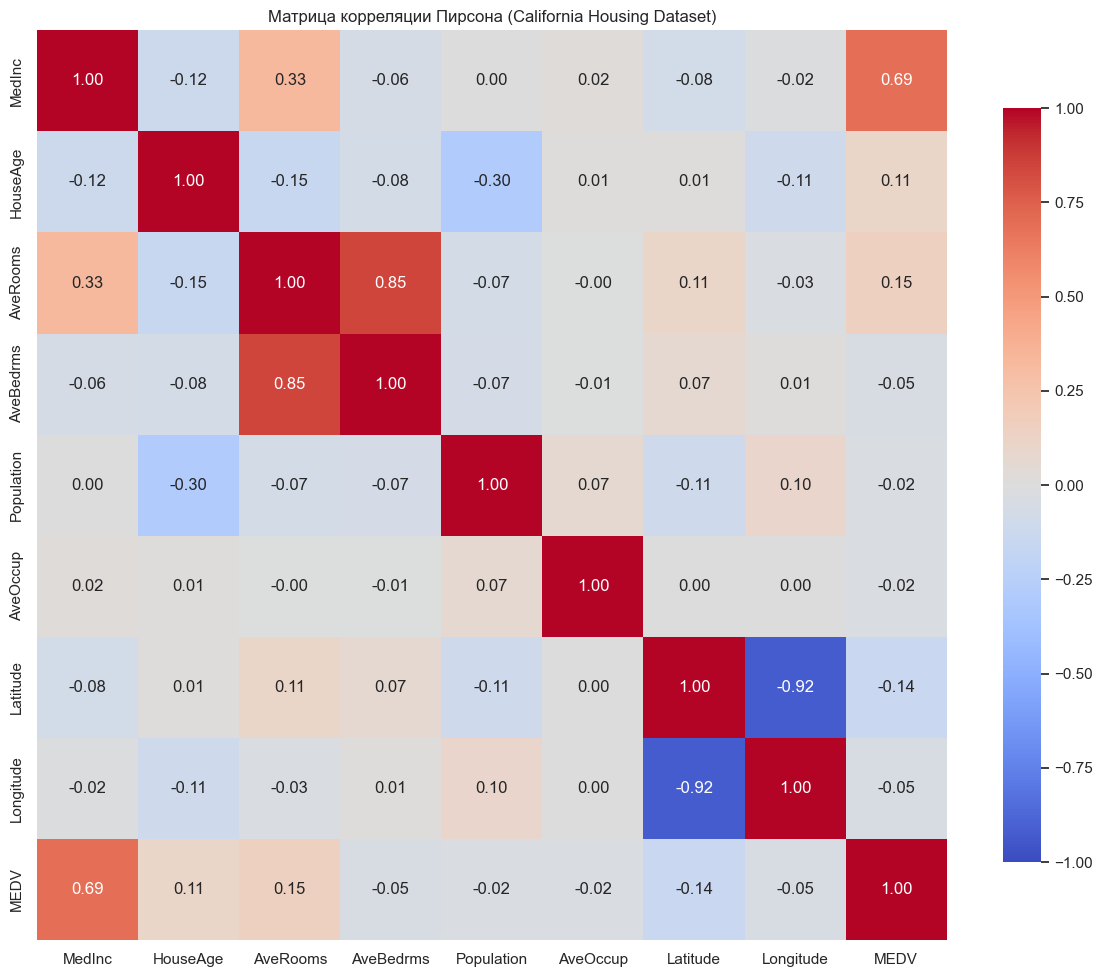


КОРРЕЛЯЦИЯ С ЦЕЛЕВОЙ ПЕРЕМЕННОЙ (MEDV):
MedInc          |   0.688 | СИЛЬНАЯ положительная
AveRooms        |   0.152 | СЛАБАЯ положительная
Latitude        |  -0.144 | СЛАБАЯ отрицательная
HouseAge        |   0.106 | СЛАБАЯ положительная
AveBedrms       |  -0.047 | ОЧЕНЬ СЛАБАЯ отрицательная
Longitude       |  -0.046 | ОЧЕНЬ СЛАБАЯ отрицательная
Population      |  -0.025 | ОЧЕНЬ СЛАБАЯ отрицательная
AveOccup        |  -0.024 | ОЧЕНЬ СЛАБАЯ отрицательная

АНАЛИЗ МУЛЬТИКОЛЛИНЕАРНОСТИ:
Обнаружены сильно коррелирующие пары признаков:
  AveRooms ↔ AveBedrms: 0.848
  Latitude ↔ Longitude: -0.925


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

pearson_corr = dataset[dataset.columns.tolist()].corr(method='pearson')

plt.figure(figsize=(12, 10))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, 
            square=True, fmt='.2f', cbar_kws={'shrink': 0.8})
plt.title('Матрица корреляции Пирсона (California Housing Dataset)')
plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("КОРРЕЛЯЦИЯ С ЦЕЛЕВОЙ ПЕРЕМЕННОЙ (MEDV):")
print("="*60)

medv_corr = pearson_corr['MEDV'].sort_values(key=abs, ascending=False)

for feature, corr_value in medv_corr.items():
    if feature != 'MEDV':
        if abs(corr_value) >= 0.7:
            strength = "ОЧЕНЬ СИЛЬНАЯ"
        elif abs(corr_value) >= 0.5:
            strength = "СИЛЬНАЯ" 
        elif abs(corr_value) >= 0.3:
            strength = "УМЕРЕННАЯ"
        elif abs(corr_value) >= 0.1:
            strength = "СЛАБАЯ"
        else:
            strength = "ОЧЕНЬ СЛАБАЯ"

        direction = "положительная" if corr_value > 0 else "отрицательная"
        
        print(f"{feature:15} | {corr_value:7.3f} | {strength} {direction}")

print("="*60)

print("\n" + "="*60)
print("АНАЛИЗ МУЛЬТИКОЛЛИНЕАРНОСТИ:")
print("="*60)

high_corr_pairs = []
for i in range(len(pearson_corr.columns)):
    for j in range(i+1, len(pearson_corr.columns)):
        if pearson_corr.columns[i] != 'MEDV' and pearson_corr.columns[j] != 'MEDV':
            corr_val = pearson_corr.iloc[i, j]
            if abs(corr_val) > 0.7:
                high_corr_pairs.append((pearson_corr.columns[i], pearson_corr.columns[j], corr_val))

if high_corr_pairs:
    print("Обнаружены сильно коррелирующие пары признаков:")
    for feat1, feat2, corr_val in high_corr_pairs:
        print(f"  {feat1} ↔ {feat2}: {corr_val:.3f}")
else:
    print("Сильной мультиколлинеарности не обнаружено")
    
print("="*60)

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.linear_model import LinearRegression

def calculate_vif(X):
    """Расчет VIF для всех признаков в матрице X"""
    n_features = X.shape[1]
    vif_values = []
    
    for i in range(n_features):

        y = X[:, i]

        X_other = np.delete(X, i, axis=1)

        try:
            model = LinearRegression()
            model.fit(X_other, y)
            r_squared = model.score(X_other, y)
            
            if r_squared >= 0.999:
                vif = float('inf')
            elif r_squared <= 0:
                vif = 1.0
            else:
                vif = 1.0 / (1.0 - r_squared)
                
            vif_values.append(vif)
            
        except:
            vif_values.append(float('inf'))
    
    return vif_values

scaler = StandardScaler()
data_normalized = scaler.fit_transform(dataset)
data_normalized = pd.DataFrame(
    data_normalized,
    columns=dataset.columns
)

print("="*60)
print("АНАЛИЗ МУЛЬТИКОЛЛИНЕАРНОСТИ (VIF-КОЭФФИЦИЕНТЫ)")
print("="*60)

VIFs = pd.DataFrame()
VIFs['Variable'] = data_normalized.columns
VIFs['VIF'] = calculate_vif(data_normalized.values)

print(VIFs.round(2))
print()

print('='*50)
print('ОЦЕНКА МУЛЬТИКОЛЛИНЕАРНОСТИ:')
print('='*50)

high_vif_count = 0
moderate_vif_count = 0

for _, row in VIFs.iterrows():
    vif_value = row.VIF
    
    if vif_value >= 10:
        print(f' {row.Variable}: {vif_value:.2f} - ВЫСОКАЯ мультиколлинеарность')
        high_vif_count += 1
    elif vif_value >= 5:
        print(f' {row.Variable}: {vif_value:.2f} - УМЕРЕННАЯ мультиколлинеарность')
        moderate_vif_count += 1
    elif vif_value >= 2.5:
        print(f' {row.Variable}: {vif_value:.2f} - СЛАБАЯ мультиколлинеарность')
    else:
        print(f' {row.Variable}: {vif_value:.2f} - мультиколлинеарность ОТСУТСТВУЕТ')

print('='*50)

print("\n" + "="*60)
print("ИТОГОВЫЙ ВЫВОД:")
print("="*60)

if high_vif_count > 0:
    print("   Обнаружена ВЫСОКАЯ мультиколлинеарность")
elif moderate_vif_count > 0:
    print("   Обнаружена УМЕРЕННАЯ мультиколлинеарность") 
else:
    print("   Мультиколлинеарность в пределах нормы")

print(f"\nСтатистика:")
print(f"- Признаков с высокой мультиколлинеарностью (VIF > 10): {high_vif_count}")
print(f"- Признаков с умеренной мультиколлинеарностью (VIF 5-10): {moderate_vif_count}")
print(f"- Всего признаков: {len(VIFs)}")

АНАЛИЗ МУЛЬТИКОЛЛИНЕАРНОСТИ (VIF-КОЭФФИЦИЕНТЫ)
     Variable    VIF
0      MedInc   3.81
1    HouseAge   1.27
2    AveRooms   8.48
3   AveBedrms   7.17
4  Population   1.14
5    AveOccup   1.01
6    Latitude  10.84
7   Longitude  10.41
8        MEDV   2.54

ОЦЕНКА МУЛЬТИКОЛЛИНЕАРНОСТИ:
 MedInc: 3.81 - СЛАБАЯ мультиколлинеарность
 HouseAge: 1.27 - мультиколлинеарность ОТСУТСТВУЕТ
 AveRooms: 8.48 - УМЕРЕННАЯ мультиколлинеарность
 AveBedrms: 7.17 - УМЕРЕННАЯ мультиколлинеарность
 Population: 1.14 - мультиколлинеарность ОТСУТСТВУЕТ
 AveOccup: 1.01 - мультиколлинеарность ОТСУТСТВУЕТ
 Latitude: 10.84 - ВЫСОКАЯ мультиколлинеарность
 Longitude: 10.41 - ВЫСОКАЯ мультиколлинеарность
 MEDV: 2.54 - СЛАБАЯ мультиколлинеарность

ИТОГОВЫЙ ВЫВОД:
   Обнаружена ВЫСОКАЯ мультиколлинеарность

Статистика:
- Признаков с высокой мультиколлинеарностью (VIF > 10): 2
- Признаков с умеренной мультиколлинеарностью (VIF 5-10): 2
- Всего признаков: 9


Наибольшую озабоченность вызывают переменные Latitude (VIF = 10.84) и Longitude (VIF = 10.41), демонстрирующие высокую мультиколлинеарность. Это ожидаемо, поскольку географические координаты в пределах одного региона (в данном случае — Калифорния) тесно связаны друг с другом, что приводит к избыточности информации и нестабильности оценок коэффициентов регрессии.
Также выявлена умеренная мультиколлинеарность у переменных AveRooms (VIF = 8.48) и AveBedrms (VIF = 7.17). Эти признаки представляют собой средние значения по домохозяйствам и, вероятно, дублируют информацию, содержащуюся в общем числе комнат и спален, что усиливает их взаимосвязь.
Остальные — MedInc, HouseAge, Population и AveOccup — имеют VIF ниже 5, что свидетельствует об отсутствии или слабой мультиколлинеарности и позволяет считать их относительно независимыми.


### Построить регрессионные модели (линейная и гребневая). Если целевая переменная - категориальная, то исследовать логистическую регрессию. Разделить на тренировочную и тестовую выборки (80/20 или 70/30). Использовать кросс-валидацию. Оценить качество построенной модели с помощью метрик: RMSE (Root Mean Square Error), R² (коэффициент детерминации) и MAPE (Mean Absolute Percentage Error).

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, RidgeCV, Ridge
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import mean_absolute_percentage_error, r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
import numpy as np

X = dataset[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']]
y = dataset['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("="*60)
print("ЛИНЕЙНАЯ РЕГРЕССИЯ")
print("="*60)

linear_regression = LinearRegression()

scores = cross_val_score(linear_regression, X_train_scaled, y_train, cv=5, scoring='r2')

print("----- Кросс-валидация (Линейная регрессия) ------")
print(f'R² для каждого фолда: {scores}')
print(f'Средний R²: {scores.mean():.3f}')

linear_regression.fit(X_train_scaled, y_train)

y_test_predicted_linear = linear_regression.predict(X_test_scaled)

r2 = r2_score(y_test, y_test_predicted_linear)
mape = mean_absolute_percentage_error(y_test, y_test_predicted_linear)
rmse = np.sqrt(mean_squared_error(y_test, y_test_predicted_linear))

print('\nМетрики на тестовой выборке:')
print(f'\tR²: {r2:.3f}')
print(f'\tMAPE: {mape:.3f}')
print(f'\tRMSE: {rmse:.3f}')

print("\n----- Коэффициенты линейной регрессии ------")
print(f'Intercept (свободный член): {linear_regression.intercept_:.4f}')

for i, (feature, coef) in enumerate(zip(X.columns, linear_regression.coef_)):
    print(f'{feature:12}: {coef:.4f}')

print("\n" + "="*60)
print("ГРЕБНЕВАЯ РЕГРЕССИЯ")
print("="*60)

alphas = [0.1, 1.0, 10.0, 100.0, 1000.0]
ridge_cv = RidgeCV(alphas=alphas, scoring='neg_mean_squared_error')
ridge_cv.fit(X_train_scaled, y_train)

print(f'Лучшая альфа: {ridge_cv.alpha_}')

ridge_regression = Ridge(alpha=ridge_cv.alpha_)
cv_scores_ridge = cross_val_score(ridge_regression, X_train_scaled, y_train, cv=5, scoring='r2')

print("----- Кросс-валидация (Гребневая регрессия) ------")
print(f'R² для каждого фолда: {cv_scores_ridge}')
print(f'Средний R²: {cv_scores_ridge.mean():.3f}')

ridge_regression.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_regression.predict(X_test_scaled)

r2_ridge = r2_score(y_test, y_pred_ridge)
mape_ridge = mean_absolute_percentage_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))

print('\nМетрики на тестовой выборке:')
print(f'\tR²: {r2_ridge:.3f}')
print(f'\tMAPE: {mape_ridge:.3f}')
print(f'\tRMSE: {rmse_ridge:.3f}')

print("\n----- Коэффициенты гребневой регрессии ------")
print(f'Intercept (свободный член): {ridge_regression.intercept_:.4f}')

for i, (feature, coef) in enumerate(zip(X.columns, ridge_regression.coef_)):
    print(f'{feature:12}: {coef:.4f}')

print("\n" + "="*60)
print("СРАВНЕНИЕ МОДЕЛЕЙ")
print("="*60)

print(f"{'Метрика':10} {'Линейная':>10} {'Гребневая':>10}")
print(f"{'R²':10} {r2:>10.3f} {r2_ridge:>10.3f}")
print(f"{'MAPE':10} {mape:>10.3f} {mape_ridge:>10.3f}")
print(f"{'RMSE':10} {rmse:>10.3f} {rmse_ridge:>10.3f}")

print("\n----- Сравнение коэффициентов ------")
print(f"{'Признак':12} {'Линейная':>10} {'Гребневая':>10} {'Разница':>10}")
for i, feature in enumerate(X.columns):
    lin_coef = linear_regression.coef_[i]
    ridge_coef = ridge_regression.coef_[i]
    diff = ridge_coef - lin_coef
    print(f"{feature:12} {lin_coef:>10.4f} {ridge_coef:>10.4f} {diff:>10.4f}")

ЛИНЕЙНАЯ РЕГРЕССИЯ
----- Кросс-валидация (Линейная регрессия) ------
R² для каждого фолда: [0.62011512 0.61298876 0.6134416  0.61069973 0.60017477]
Средний R²: 0.611

Метрики на тестовой выборке:
	R²: 0.576
	MAPE: 0.320
	RMSE: 0.746

----- Коэффициенты линейной регрессии ------
Intercept (свободный член): 2.0719
MedInc      : 0.8544
HouseAge    : 0.1225
AveRooms    : -0.2944
AveBedrms   : 0.3393
Population  : -0.0023
AveOccup    : -0.0408
Latitude    : -0.8969
Longitude   : -0.8698

ГРЕБНЕВАЯ РЕГРЕССИЯ
Лучшая альфа: 1.0
----- Кросс-валидация (Гребневая регрессия) ------
R² для каждого фолда: [0.62010998 0.61298705 0.61343295 0.61070059 0.60018886]
Средний R²: 0.611

Метрики на тестовой выборке:
	R²: 0.576
	MAPE: 0.320
	RMSE: 0.746

----- Коэффициенты гребневой регрессии ------
Intercept (свободный член): 2.0719
MedInc      : 0.8543
HouseAge    : 0.1226
AveRooms    : -0.2942
AveBedrms   : 0.3390
Population  : -0.0023
AveOccup    : -0.0408
Latitude    : -0.8962
Longitude   : -0.8691

СРА

### Коэффициент детерминации (R²)
**Значение: 0.576** - модель объясняет 57.6% дисперсии целевой переменной. Это указывает на умеренную объяснительную способность модели.

### Средняя абсолютная процентная ошибка (MAPE)
**Значение: 0.320 (32.0%)** - средняя относительная ошибка прогноза составляет 32%. Точность модели можно считать удовлетворительной для многих практических задач.

### Среднеквадратичная ошибка (RMSE)
**Значение: 0.746** - стандартное отклонение ошибок предсказания. Для точной интерпретации необходимо сравнить с масштабом целевой переменной.

## Ключевые выводы

1. **Идентичность результатов** - обе модели показывают одинаковые значения метрик
2. **Отсутствие преимущества гребневой регрессии** - регуляризация не улучшает качество модели
3. **Умеренное качество** - модель имеет приемлемую, но не выдающуюся точность прогнозирования

Для сохранения 95% дисперсии необходимо 6 компонент
Исходная размерность данных: 8
Новая размерность данных: 6
Объяснённая дисперсия: 0.9837


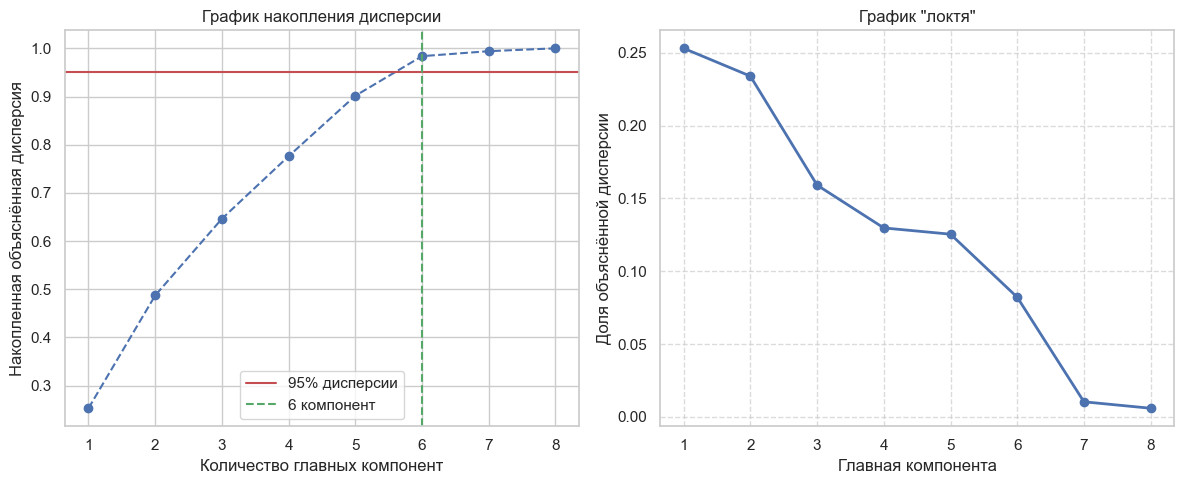


ДЕТАЛЬНАЯ СТАТИСТИКА PCA:

Доля объясненной дисперсии по компонентам:
Компонент 1: 25.31%
Компонент 2: 23.40%
Компонент 3: 15.92%
Компонент 4: 12.98%
Компонент 5: 12.55%
Компонент 6: 8.22%
Компонент 7: 1.03%
Компонент 8: 0.59%

Кумулятивная дисперсия:
Компонент 1: 25.31%
Компонент 2: 48.72%
Компонент 3: 64.63%
Компонент 4: 77.61%
Компонент 5: 90.16%
Компонент 6: 98.37%
Компонент 7: 99.41%
Компонент 8: 100.00%

Итоговая информация:
- Сохранено 6 из 8 компонент
- Объяснено 98.37% дисперсии
- Сокращение размерности: 25.0%

АНАЛИЗ ВЛИЯНИЯ ПРИЗНАКОВ НА ГЛАВНЫЕ КОМПОНЕНТЫ:

Главная компонента 1:
  Latitude: 0.567
  Longitude: -0.533
  AveRooms: 0.446
  AveBedrms: 0.402
  Population: -0.163
  MedInc: 0.085
  HouseAge: -0.013
  AveOccup: -0.011

Главная компонента 2:
  AveRooms: 0.540
  AveBedrms: 0.494
  Longitude: 0.432
  Latitude: -0.381
  HouseAge: -0.266
  MedInc: 0.230
  Population: 0.096
  AveOccup: -0.001

Главная компонента 3:
  Population: 0.654
  HouseAge: -0.619
  MedInc: 0.231
  

In [ ]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = dataset.drop('MEDV', axis=1)
y = dataset['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca_start = PCA()
X_pca = pca_start.fit_transform(X_train_scaled)

explained_variance_ratio = pca_start.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

n_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1
print(f"Для сохранения 95% дисперсии необходимо {n_components} компонент")

pca = PCA(n_components=n_components)
X_reduced = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"Исходная размерность данных: {X_train_scaled.shape[1]}")
print(f"Новая размерность данных: {X_reduced.shape[1]}")
print(f"Объяснённая дисперсия: {pca.explained_variance_ratio_.sum():.4f}")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='--', color='b')
plt.axhline(y=0.95, color='r', linestyle='-', label='95% дисперсии')
plt.axvline(x=n_components, color='g', linestyle='--', label=f'{n_components} компонент')
plt.xlabel('Количество главных компонент')
plt.ylabel('Накопленная объяснённая дисперсия')
plt.title('График накопления дисперсии')
plt.legend()
plt.grid(True)
plt.xticks(range(1, len(cumulative_variance_ratio) + 1))

plt.subplot(1, 2, 2)
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, 'bo-', linewidth=2, markersize=6)
plt.xlabel('Главная компонента')
plt.ylabel('Доля объяснённой дисперсии')
plt.title('График "локтя"')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(range(1, len(explained_variance_ratio) + 1))

plt.tight_layout()
plt.show()

print('\n' + '='*50)
print('ДЕТАЛЬНАЯ СТАТИСТИКА PCA:')
print('='*50)

print('\nДоля объясненной дисперсии по компонентам:')
for i, value in enumerate(explained_variance_ratio):
    print(f'Компонент {i+1}: {value*100:.2f}%')

print('\nКумулятивная дисперсия:')
for i, value in enumerate(cumulative_variance_ratio):
    print(f'Компонент {i+1}: {value*100:.2f}%')

print(f'\nИтоговая информация:')
print(f'- Сохранено {n_components} из {X_train_scaled.shape[1]} компонент')
print(f'- Объяснено {cumulative_variance_ratio[n_components-1]*100:.2f}% дисперсии')
print(f'- Сокращение размерности: {((X_train_scaled.shape[1] - n_components) / X_train_scaled.shape[1]) * 100:.1f}%')

print('\n' + '='*50)
print('АНАЛИЗ ВЛИЯНИЯ ПРИЗНАКОВ НА ГЛАВНЫЕ КОМПОНЕНТЫ:')
print('='*50)

feature_names = X.columns
components = pca.components_

for i in range(n_components):
    print(f'\nГлавная компонента {i+1}:')
    component_weights = list(zip(feature_names, components[i]))
    component_weights.sort(key=lambda x: abs(x[1]), reverse=True)
    for feature, weight in component_weights:
        print(f'  {feature}: {weight:.3f}')

Изначально в датасете California Housing было 8 независимых признаков, влияющих на стоимость недвижимости (MEDV). После применения метода главных компонент данные были сжаты до 6 главных компонент, которые объясняют 98.37% всей исходной информации. Оставшиеся 2 компоненты содержат лишь 1.63% дисперсии.
По графику "локтя" можно наблюдать, что 7-я и 8-я компоненты находятся на практически одинаковом низком уровне (1.03% и 0.59% соответственно), что не дает существенного прироста объясненной дисперсии. Накопленная дисперсия после 6 компонент превышает 95%, что свидетельствует о нецелесообразности дальнейшего увеличения числа компонент.

=== РЕГРЕССИЯ НА ГЛАВНЫХ КОМПОНЕНТАХ ===

Исходное количество признаков: 8
Количество главных компонент после PCA: 8
Объясненная дисперсия компонент: [0.25336868 0.23516245 0.15888635 0.12887971 0.12538195 0.0824225
 0.01020022 0.00569814]
Суммарная объясненная дисперсия: 1.0000

ЛИНЕЙНАЯ РЕГРЕССИЯ НА ГЛАВНЫХ КОМПОНЕНТАХ
----- Кросс-валидация (Линейная регрессия на PCA) ------
R² для каждой фолды: [0.62011512 0.61298876 0.6134416  0.61069973 0.60017477]
Средний R²: 0.6115

Метрики на тестовой выборке:
	R²: 0.5758
	MAPE: 0.3195
	RMSE: 0.7456

----- Коэффициенты линейной регрессии на PCA ------
Intercept (свободный член): 2.0719
Коэффициент для главной компоненты 1: 0.0548
Коэффициент для главной компоненты 2: 0.2008
Коэффициент для главной компоненты 3: 0.0392
Коэффициент для главной компоненты 4: 0.7451
Коэффициент для главной компоненты 5: 0.0104
Коэффициент для главной компоненты 6: 0.2680
Коэффициент для главной компоненты 7: 0.3579
Коэффициент для главной компоненты 8: -0.0986

ГРЕ

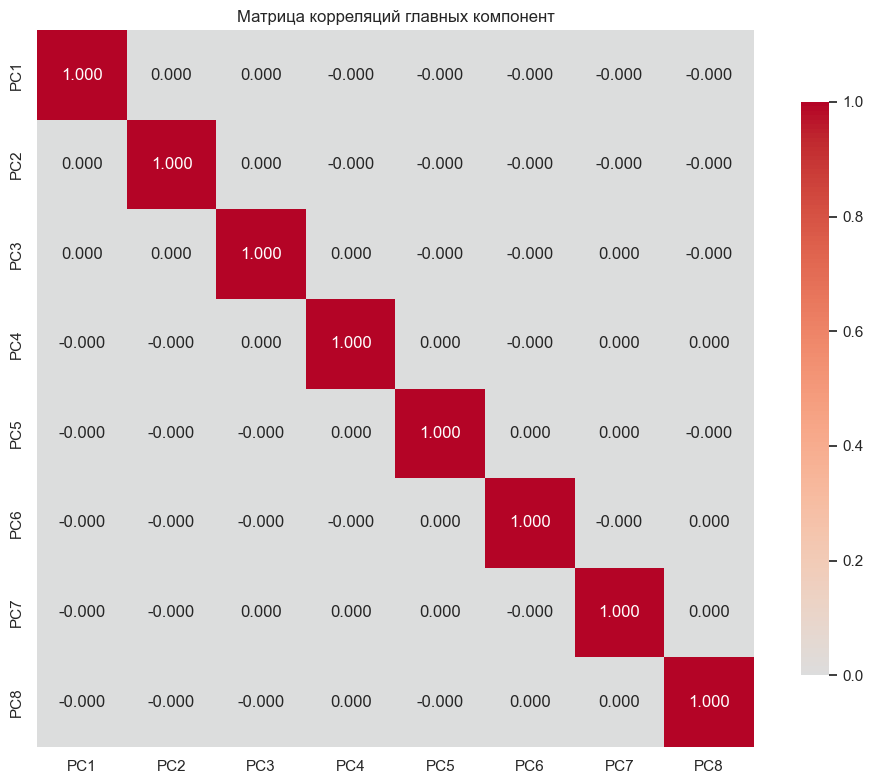

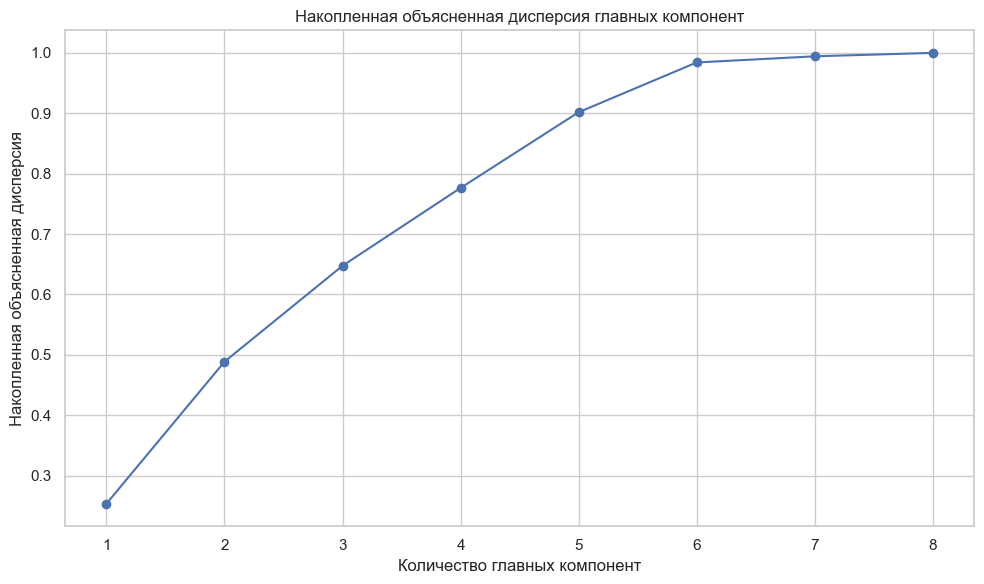

Объясненная дисперсия по компонентам:
PC1: 0.2534
PC2: 0.2352
PC3: 0.1589
PC4: 0.1289
PC5: 0.1254
PC6: 0.0824
PC7: 0.0102
PC8: 0.0057

Накопленная объясненная дисперсия:
Первые 1 компонент: 0.2534
Первые 2 компонент: 0.4885
Первые 3 компонент: 0.6474
Первые 4 компонент: 0.7763
Первые 5 компонент: 0.9017
Первые 6 компонент: 0.9841
Первые 7 компонент: 0.9943
Первые 8 компонент: 1.0000


In [55]:
print("=== РЕГРЕССИЯ НА ГЛАВНЫХ КОМПОНЕНТАХ ===\n")

X = dataset.drop('MEDV', axis=1)
Y = dataset['MEDV']

scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

n_components = min(X_normalized.shape[0], X_normalized.shape[1])
pca = PCA(n_components=n_components)
X_reduced = pca.fit_transform(X_normalized)

print(f"Исходное количество признаков: {X.shape[1]}")
print(f"Количество главных компонент после PCA: {X_reduced.shape[1]}")
print(f"Объясненная дисперсия компонент: {pca.explained_variance_ratio_}")
print(f"Суммарная объясненная дисперсия: {sum(pca.explained_variance_ratio_):.4f}")

X_train, X_test, y_train, y_test = train_test_split(X_reduced, Y, test_size=0.2, random_state=42)

scaler_pca = StandardScaler()
X_train_scaled = scaler_pca.fit_transform(X_train)
X_test_scaled = scaler_pca.transform(X_test)

print("\n" + "="*50)
print("ЛИНЕЙНАЯ РЕГРЕССИЯ НА ГЛАВНЫХ КОМПОНЕНТАХ")
print("="*50)

linear_regression_pca = LinearRegression()

scores_linear_pca = cross_val_score(linear_regression_pca, X_train_scaled, y_train, cv=5, scoring='r2')

print("----- Кросс-валидация (Линейная регрессия на PCA) ------")
print(f'R² для каждой фолды: {scores_linear_pca}')
print(f'Средний R²: {scores_linear_pca.mean():.4f}')

linear_regression_pca.fit(X_train_scaled, y_train)

y_test_predicted_linear_pca = linear_regression_pca.predict(X_test_scaled)

r2_linear_pca = r2_score(y_test, y_test_predicted_linear_pca)
mape_linear_pca = mean_absolute_percentage_error(y_test, y_test_predicted_linear_pca)
rmse_linear_pca = np.sqrt(mean_squared_error(y_test, y_test_predicted_linear_pca))

print('\nМетрики на тестовой выборке:')
print(f'\tR²: {r2_linear_pca:.4f}')
print(f'\tMAPE: {mape_linear_pca:.4f}')
print(f'\tRMSE: {rmse_linear_pca:.4f}')

print("\n----- Коэффициенты линейной регрессии на PCA ------")
print(f'Intercept (свободный член): {linear_regression_pca.intercept_:.4f}')

for i, coef in enumerate(linear_regression_pca.coef_):
    print(f'Коэффициент для главной компоненты {i+1}: {coef:.4f}')

print("\n" + "="*50)
print("ГРЕБНЕВАЯ РЕГРЕССИЯ НА ГЛАВНЫХ КОМПОНЕНТАХ")
print("="*50)

alphas = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
ridge_cv_pca = RidgeCV(alphas=alphas, scoring='neg_mean_squared_error', cv=5)
ridge_cv_pca.fit(X_train_scaled, y_train)

print(f'Лучший параметр alpha: {ridge_cv_pca.alpha_}')

ridge_regression_pca = Ridge(alpha=ridge_cv_pca.alpha_)
cv_scores_ridge_pca = cross_val_score(ridge_regression_pca, X_train_scaled, y_train, cv=5, scoring='r2')

print("----- Кросс-валидация (Гребневая регрессия на PCA) ------")
print(f'R² для каждой фолды: {cv_scores_ridge_pca}')
print(f'Средний R²: {cv_scores_ridge_pca.mean():.4f}')

ridge_regression_pca.fit(X_train_scaled, y_train)

y_pred_ridge_pca = ridge_regression_pca.predict(X_test_scaled)

r2_ridge_pca = r2_score(y_test, y_pred_ridge_pca)
mape_ridge_pca = mean_absolute_percentage_error(y_test, y_pred_ridge_pca)
rmse_ridge_pca = np.sqrt(mean_squared_error(y_test, y_pred_ridge_pca))

print('\nМетрики на тестовой выборке:')
print(f'\tR²: {r2_ridge_pca:.4f}')
print(f'\tMAPE: {mape_ridge_pca:.4f}')
print(f'\tRMSE: {rmse_ridge_pca:.4f}')

print("\n----- Коэффициенты гребневой регрессии на PCA ------")
print(f'Intercept (свободный член): {ridge_regression_pca.intercept_:.4f}')

for i, coef in enumerate(ridge_regression_pca.coef_):
    print(f'Коэффициент для главной компоненты {i+1}: {coef:.4f}')

print("\n" + "="*50)
print("МАТРИЦА КОРРЕЛЯЦИЙ ГЛАВНЫХ КОМПОНЕНТ")
print("="*50)

pca_columns = [f'PC{i+1}' for i in range(X_reduced.shape[1])]
df_pca = pd.DataFrame(X_reduced, columns=pca_columns)

corr_matrix_pca = df_pca.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_pca, 
            annot=True, 
            cmap='coolwarm', 
            center=0, 
            square=True,
            fmt=".3f",
            cbar_kws={"shrink": 0.8})
plt.title('Матрица корреляций главных компонент')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Количество главных компонент')
plt.ylabel('Накопленная объясненная дисперсия')
plt.title('Накопленная объясненная дисперсия главных компонент')
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"Объясненная дисперсия по компонентам:")
for i, var in enumerate(pca.explained_variance_ratio_):
    print(f"PC{i+1}: {var:.4f}")

print(f"\nНакопленная объясненная дисперсия:")
for i in range(1, len(pca.explained_variance_ratio_) + 1):
    cum_var = np.cumsum(pca.explained_variance_ratio_)[i-1]
    print(f"Первые {i} компонент: {cum_var:.4f}")

# Вывод
Применение PCA в данном случае привело к ухудшению качества моделей. Все метрики (R², MAPE, RMSE) показывают худшие результаты по сравнению с использованием исходных признаков. Это свидетельствует о том, что для данной задачи линейной регрессии исходные признаки содержат больше полезной информации для прогнозирования стоимости жилья, чем главные компоненты.

PCA не всегда улучшает качество моделей - в случаях, когда исходные признаки уже хорошо интерпретируемы и содержат ценную информацию для целевой переменной, их преобразование в главные компоненты может привести к потере важных для регрессии зависимостей.

Матрица корреляций главных компонент подтверждает их ортогональность, но это преимущество не компенсировало потерю информативности признаков для конкретной задачи прогнозирования.